# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>

&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#25-feature-engineering)<br>

# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to create a classification model that can accurately predict the WCB’s final decision on what type of injury (Claim Injury Type) should be given to a claim. To do that, the WCB has provided labelled data with all claims assembled between
2020 and 02222 <r>. 

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>


## 1.1 Importing Libraries <a name="11-importing-libraries"></a>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>


In [2]:
train_data = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
train_data.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [3]:
X_test = pd.read_csv('test_data.csv', sep = ',', low_memory=False)
pd.set_option('display.max_columns', None)

### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claiWCBhearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  
`Number of Dependents` Number of Dependents

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each cWCBgned by train_data.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where thstrict Namejury occurred.WCBe` Name of the train_data district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses accority. aim, with numbering indicating severity. <br>  


**Injury Descriptions and Codes**  <br>
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  <br>
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes** <br>
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim. <br>
`WCB Decision` Decision of the WCB relative to the claim: <br>
“Accident” means that claim refers to workplace accident, <br>
“Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim. <br>
`Claim Injury Type` WCB target variable: Deliberation of the WCB relative to benefits awarded to the claim. Numbering indicates severity. <br>  

## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>


### `Shape`

In [4]:
train_data.shape

(593471, 33)

### `General info on features`

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

From basic descriptive statistics, we can immediately notice that of 593471 entries:
- only 2 features have a 0 non-null count - `Assembly Date` and `Claim Identifier`
- there is 1 feature with all null values - `OIICS Nature of Injury Description`
- there are features in a unusual datype for their context
- most of our data is categorical

Further insights will be gathered in following steps of the notebook.

### `Checking for footnotes or summary totals`

In [6]:
train_data.tail(5)
# No, there arent't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Numeric features descriptive analysis`

In [7]:
train_data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


We immediately notice:
- unusual minimum and/or maximum values, for example, in `Age at Injury`, `Number of Dependents`, `IME-4 Count`, `WCIO Part Of Body Code`
- Presence of outliers, when analysing data per quartiles

### `Categorical features descriptive analysis`

In [8]:
train_data.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


We immediately notice:
- No variance in `WCB Decision`
- High unique counts for some categorical features like `Zip Code`, `Carrier Name`
- 4 unique values for `Gender`, an amount to further investigate

## 1.4 Incoherencies <a name="14-incoherencies"></a>


**Let's begin exploring incoherencies immediately noticed on visualizations and descriptive statistics:**

### `Step 1` **Datatype conversions**

**To Integer** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>

**To Object** <br>
`OIICS Nature of Injury Description` <br>
`Agreement Reached` <br>
`Claim Identifier` <br>
`Industry Code` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>

**To Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Date` <br>

**Applying changes:**

**Data conversion to integer:**

In [9]:
to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']

for col in to_int:
    # Convert to numeric and handle NaNs by keeping them as NaN, then cast to Int64
    train_data[col] = pd.to_numeric(train_data[col], errors='coerce').astype("Int64")
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce').astype("Int64")

**Data conversion to object:**

In [10]:
train_to_object = ['Agreement Reached', 'OIICS Nature of Injury Description', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

In [11]:
test_to_object = ['OIICS Nature of Injury Description', 'Claim Identifier', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

In [12]:
train_data[train_to_object] = train_data[train_to_object].astype('object')

In [13]:
X_test[test_to_object] = X_test[test_to_object].astype('object')

**Dates conversion to datetime format:**

In [14]:
# Convert dates treated as objects to datetime format
train_data['C-2 Date'] = pd.to_datetime(train_data['C-2 Date'], errors='coerce')
train_data['C-3 Date'] = pd.to_datetime(train_data['C-3 Date'], errors='coerce')
train_data['Accident Date'] = pd.to_datetime(train_data['Accident Date'], errors='coerce')
train_data['First Hearing Date'] = pd.to_datetime(train_data['First Hearing Date'], errors='coerce')
train_data['Assembly Date'] = pd.to_datetime(train_data['Assembly Date'], errors='coerce')

In [15]:
# Convert dates treated as objects to datetime format
X_test['C-2 Date'] = pd.to_datetime(X_test['C-2 Date'], errors='coerce')
X_test['C-3 Date'] = pd.to_datetime(X_test['C-3 Date'], errors='coerce')
X_test['Accident Date'] = pd.to_datetime(X_test['Accident Date'], errors='coerce')
X_test['First Hearing Date'] = pd.to_datetime(X_test['First Hearing Date'], errors='coerce')
X_test['Assembly Date'] = pd.to_datetime(X_test['Assembly Date'], errors='coerce')

Checking new datatypes:

In [16]:
train_data.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                              object
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

In [17]:
train_data.dtypes.astype(str).value_counts().sort_values(ascending=False)

object            23
datetime64[ns]     5
Int64              4
float64            1
Name: count, dtype: int64

### `Step 2` **Features with unexpected negative values**

There is one feature 'WCIO Part Of Body Code' with negative values, which isn't coherent with the feature's context:

In [18]:
# Count negative values for each column
negative_counts = train_data.astype(str).apply(lambda col: col.str.startswith('-')).sum()
negative_counts

Accident Date                             0
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                       0
Birth Year                                0
C-2 Date                                  0
C-3 Date                                  0
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                        0
Gender                                    0
IME-4 Count                               0
Industry Code                             0
Industry Code Description                 0
Medical Fee Region                        0
OIICS Nature of Injury Descripti

**Upon inspecting the dataset, we observed that for WCIO Part Of Body Code, there is one negative value of '-9', for which it corresponds one WCIO Part Of Body Description - 'Multiple'.
Furthermore, we can observe that there is no 09 code present in the dataset:**

In [19]:
train_data['WCIO Part Of Body Code'].value_counts()

WCIO Part Of Body Code
 42.0    51862
 53.0    47903
-9.0     42011
 38.0    37811
 36.0    36093
 35.0    31388
 55.0    24928
 90.0    22608
 56.0    18765
 34.0    18750
 33.0    15372
 60.0    14000
 18.0    13765
 14.0    12975
 37.0    12525
 54.0    11622
 31.0    11236
 91.0    10950
 32.0     9949
 41.0     8240
 10.0     7939
 11.0     7904
 44.0     7644
 61.0     6770
 51.0     6430
 66.0     6103
 25.0     5938
 65.0     5311
 52.0     4296
 13.0     3912
 19.0     3905
 48.0     3759
 20.0     2848
 30.0     2633
 39.0     2623
 57.0     2535
 15.0     2091
 63.0     1998
 12.0     1989
 50.0     1927
 43.0     1893
 58.0     1806
 40.0     1752
 17.0     1602
 21.0     1332
 99.0     1249
 62.0     1161
 22.0     1103
 16.0      803
 46.0      740
 49.0      637
 23.0      477
 45.0      402
 47.0      402
 24.0      141
 26.0       83
 64.0       53
Name: count, dtype: int64

In [20]:
train_data[train_data['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

**The WCIO Codes are expected to be a natural number and it is crucial that the correspondence between code and description is consistent and unique.
After verifying these conditions, and that there is no '09' WCIO Code, we can confidently assume that "-9" was an entry error intended to represent 9. <br>
Replacing it on the dataset:**

In [21]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace(-9, 9)

In [22]:
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].replace(-9, 9)

### `Step 3` **Features that should have a matching number of unique values**:

`WCIO Part Of Body Code`<> `WCIO Part Of Body Description`<br>
`Industry Code`<> `Industry Code Description`<br>
`WCIO Cause of Injury Code`<> `WCIO Cause of Injury Description`<br>

Each of these pairs will be analysed below.

In nb0 notebook (visualizations notebook), we discovered that there are more codes than descriptions for `WCIO Part Of Body Code`, as previously mentioned. Codes 47, 43 and 25 had multiple descriptions, which is not supposed to happen. To correct this we check the code that corresponds to the descriptions with multiple codes and switch them for the code that happears more times.
Same happens in `Industry Code` and `WCIO Cause of Injury Code`, where we procced the same way.

#### `WCIO Part Of Body Code`<> `WCIO Part Of Body Description`

**We find that there are three more codes than description, which does not make sense. In order to fix this, we will ensure that each description corresponds to only one code.** <br>

We make the assumption that the code appearing first is the correct one, therefore we proceed to replace the duplicated descriptions for the first occurrence of its corresponding code:

In [23]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [24]:
X_test['WCIO Part Of Body Code'] = X_test['WCIO Part Of Body Code'].replace({47: 23, 43: 22, 25: 18})

In [25]:
train_data[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].nunique()
#now we have the same count for each

WCIO Part Of Body Code           54
WCIO Part Of Body Description    54
dtype: int64

#### `Industry Code`<> `Industry Code Description`

**Below, We will use the same approach as in WCIO Part of Body in the set.**

**After identifying which descriptions have more than one code (above), we will proceed to its replacement, following the same assumption that the first occurence of code is the correct one:**

In [26]:
train_data['Industry Code'] = train_data['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

In [27]:
X_test['Industry Code'] = X_test['Industry Code'].replace({45: 44, 32: 31, 33: 31, 49: 48})

Confirming that changes are in place:

In [28]:
train_data[['Industry Code', 'Industry Code Description']].nunique()

Industry Code                20
Industry Code Description    20
dtype: int64

#### `WCIO Cause of Injury Code` <> `WCIO Cause of Injury Description`

**After identifying which descriptions have more than one code (above), we will proceed to its replacement, following the same assumption that the first occurence of code is the correct one:**

**Replacing values**:

In [29]:
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].replace({94:97, 17:79, 66:79})

In [30]:
X_test['WCIO Cause of Injury Code'] = X_test['WCIO Cause of Injury Code'].replace({94:97, 17:79, 66:79})

Confirming that changes are in place:

In [31]:
train_data[['WCIO Cause of Injury Code','WCIO Cause of Injury Description']].nunique()

WCIO Cause of Injury Code           74
WCIO Cause of Injury Description    74
dtype: int64

### `Step 3` **Features with values represented as both numbers and strings**

`Carrier Type` <br>

In [32]:
train_data['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [33]:
train_data[train_data['Carrier Type'].astype(str).str.contains('5')]['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        437
4. TEMPORARY       395
3. MED ONLY         96
1. CANCELLED        46
5. PPD SCH LOSS     41
6. PPD NSL           8
8. DEATH             6
7. PTD               3
Name: count, dtype: int64

**Identify them by the number and discard string:** <br>
After analysing these unique values frequency, we deduct that 5A, 5C, 5D are not expressive and can all be represented by 5

In [34]:
train_data['Carrier Type'] = train_data['Carrier Type'].str[:1]
train_data['Carrier Type'].unique()

array(['1', nan, '2', '4', '3', 'U', '5'], dtype=object)

In [35]:
X_test['Carrier Type'] = X_test['Carrier Type'].str[:1]
X_test['Carrier Type'].unique()

array(['1', '3', '4', '2', 'U', '5'], dtype=object)

`Claim Injury Type`

In [36]:
train_data['Claim Injury Type'] = train_data['Claim Injury Type'].str[:1]
train_data['Claim Injury Type'].unique()

array(['2', '4', nan, '3', '5', '6', '1', '8', '7'], dtype=object)

### `Step 4` **Data doesn't follow a logical time sequence**

`Accident Date after Assembly Date and C-2 Date`

We have to check if there are some occurences where the accident is dated after its assembly. If this occurs, probably the data collection was not properly made, so we have to fix that.

In [37]:
train_data[(train_data['Accident Date'] > train_data['Assembly Date'])]['Claim Injury Type'].value_counts()

Claim Injury Type
5    723
3    350
4    255
2     54
6     14
1      7
7      3
8      1
Name: count, dtype: int64

In [38]:
train_data[(train_data['Accident Date'] > train_data['Assembly Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
168,2020-02-26,57,N,2020-01-01,Y,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3,5393953,5,KINGS,N,NYC,2020-05-04,M,<NA>,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,Not Work Related,0
412,2020-01-23,62,N,2020-01-02,Y,1775.89,1957,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3,5394099,6,QUEENS,N,NYC,2020-06-05,M,2,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11001,0.0,Not Work Related,3
582,2020-03-01,62,N,2020-01-02,Y,1467.47,1957,2020-01-17,2019-12-27,STATE INSURANCE FUND,2,5393830,5,ERIE,N,BUFFALO,2020-08-28,M,<NA>,61.0,EDUCATIONAL SERVICES,I,NaN,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,Not Work Related,1
798,2020-01-27,57,N,2020-01-03,Y,1450.00,<NA>,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3,5394613,5,NASSAU,N,NYC,2021-09-01,M,<NA>,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,Not Work Related,5
1332,2020-01-23,56,N,2020-01-03,Y,1334.92,0,2020-01-06,2019-12-26,STATE INSURANCE FUND,2,5394770,5,UNKNOWN,N,NYC,2020-05-29,M,3,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",78.0,CARPAL TUNNEL SYNDROME,34.0,WRIST,08736,1.0,Not Work Related,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590739,2023-02-02,52,N,2022-12-26,Y,992.39,1970,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1,6162010,3,ONEIDA,N,SYRACUSE,2023-11-16,M,3,53.0,REAL ESTATE AND RENTAL AND LEASING,II,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0.0,Not Work Related,6
590745,2022-12-28,55,N,2022-12-26,N,0.00,1967,2022-12-26,NaT,STATE INSURANCE FUND,2,6162263,2,BRONX,N,NYC,NaT,F,<NA>,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07407,0.0,Not Work Related,3
591212,2022-12-30,33,N,2022-12-27,Y,2884.62,1989,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3,6161996,5,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,9.0,MULTIPLE,NaN,0.0,Not Work Related,1
591972,2022-12-29,41,N,2022-12-28,N,2500.00,1981,NaT,NaT,PFL NI CARRIER UNDETERMINED,5,6162985,4,KINGS,N,STATEWIDE,NaT,F,<NA>,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6


In [39]:
train_data[(train_data['Accident Date'] > train_data['C-2 Date'])]['Claim Injury Type'].value_counts()

Claim Injury Type
5    404
4    256
3    252
2     48
6     12
1      7
7      2
8      1
Name: count, dtype: int64

In [40]:
train_data[(train_data['Accident Date'] > train_data['C-2 Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
100,2019-12-24,72,N,2020-01-01,Y,273.27,0,2019-07-31,2020-01-30,AMERICAN ZURICH INSURANCE CO,1,5394177,4,RENSSELAER,N,ALBANY,2020-05-22,M,1,44.0,RETAIL TRADE,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),20770,1.0,Not Work Related,4
168,2020-02-26,57,N,2020-01-01,Y,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3,5393953,5,KINGS,N,NYC,2020-05-04,M,<NA>,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,Not Work Related,0
412,2020-01-23,62,N,2020-01-02,Y,1775.89,1957,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3,5394099,6,QUEENS,N,NYC,2020-06-05,M,2,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11001,0.0,Not Work Related,3
582,2020-03-01,62,N,2020-01-02,Y,1467.47,1957,2020-01-17,2019-12-27,STATE INSURANCE FUND,2,5393830,5,ERIE,N,BUFFALO,2020-08-28,M,<NA>,61.0,EDUCATIONAL SERVICES,I,NaN,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,Not Work Related,1
798,2020-01-27,57,N,2020-01-03,Y,1450.00,<NA>,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3,5394613,5,NASSAU,N,NYC,2021-09-01,M,<NA>,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586422,2023-01-26,56,N,2022-12-16,Y,2191.97,1966,2022-12-16,NaT,STATE INSURANCE FUND,2,6156163,3,LEWIS,N,SYRACUSE,2024-04-25,M,<NA>,92.0,PUBLIC ADMINISTRATION,I,NaN,57.0,PUSHING OR PULLING,52.0,STRAIN OR TEAR,9.0,MULTIPLE,13316,0.0,Not Work Related,5
587790,2022-12-27,41,N,2022-12-20,Y,746.80,1981,2022-12-20,2022-12-20,AMERICAN GUAR & LIAB INS CO,1,6158378,3,WYOMING,N,ROCHESTER,2023-03-17,F,1,52.0,FINANCE AND INSURANCE,I,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,35.0,HAND,14569,0.0,Not Work Related,6
589744,2023-02-07,51,N,2022-12-22,Y,1646.06,1971,2022-12-22,2022-12-02,LIBERTY INSURANCE CORP.,1,6160613,3,NIAGARA,N,BUFFALO,2023-03-09,M,<NA>,31.0,MANUFACTURING,I,NaN,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,35.0,HAND,14092,0.0,Not Work Related,3
590739,2023-02-02,52,N,2022-12-26,Y,992.39,1970,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1,6162010,3,ONEIDA,N,SYRACUSE,2023-11-16,M,3,53.0,REAL ESTATE AND RENTAL AND LEASING,II,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0.0,Not Work Related,6


**We will consider this in Feature Engineering, by exploring transformations in features that account for this information.**

## 1.5 Preliminar Tests

At this point, we need to take a closer look at the subtle inconsistencies that immediately caught our attention.

In [41]:
train_data['Claim Injury Type'].value_counts()

Claim Injury Type
2    291078
4    148507
3     68906
5     48280
1     12477
6      4211
8       470
7        97
Name: count, dtype: int64

At first, we verify that the target variable is truly unbalanced: <br> 2. NON_COMP appears 3000 times more when comparing to 7. PTD, which can be a problem when estimating the model. 

In [42]:
train_data[train_data['Age at Injury'] == 0]['Claim Injury Type'].value_counts()

Claim Injury Type
2    2891
1    1730
4     568
3     251
5      21
8       2
6       1
Name: count, dtype: int64

In [43]:
train_data[train_data['Age at Injury'] > 75]['Claim Injury Type'].value_counts()

Claim Injury Type
2    1237
4     627
3     265
5     169
1      46
8      35
6      25
7       3
Name: count, dtype: int64

In [44]:
train_data[train_data['Age at Injury'] < 16]['Claim Injury Type'].value_counts()

Claim Injury Type
2    3043
1    1734
4     592
3     288
5      23
8       3
6       1
Name: count, dtype: int64

We also decided to check the age of the people who is not expecting to still have a job (zero age was one of the most evident values), and we obtained a significant percentage of values that are not reliable.

In [45]:
train_data[train_data['C-3 Date'].isna()]['Claim Injury Type'].value_counts()

Claim Injury Type
2    252951
4     69533
3     45065
5     11065
1      6867
6       859
8       423
7        18
Name: count, dtype: int64

In [46]:
train_data[train_data['First Hearing Date'].isna()]['Claim Injury Type'].value_counts()

Claim Injury Type
2    276837
4     71812
3     46687
5     17574
1     10282
6        36
Name: count, dtype: int64

In [47]:
train_data[train_data['IME-4 Count'].isna()]['Claim Injury Type'].value_counts()

Claim Injury Type
2    285575
4     76840
3     55113
1     12115
5     10996
8       369
6       211
7         4
Name: count, dtype: int64

We analyzed the missing values in the features with the highest percentages of missing data, and due to the way they relate to the target variable, we will explore below whether any approaches can be applied to extract meaningful information from these variables.

In [48]:
train_data[train_data['Birth Year'] == 0].shape[0]

25081

The rows with a birth year of 0 are not logically consistent and do not make sense.

In [49]:
train_data[(train_data['Accident Date'] > train_data['Assembly Date']) | (train_data['Accident Date'] > train_data['C-2 Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
100,2019-12-24,72,N,2020-01-01,Y,273.27,0,2019-07-31,2020-01-30,AMERICAN ZURICH INSURANCE CO,1,5394177,4,RENSSELAER,N,ALBANY,2020-05-22,M,1,44.0,RETAIL TRADE,UK,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),20770,1.0,Not Work Related,4
168,2020-02-26,57,N,2020-01-01,Y,1997.87,1962,2019-12-31,2020-01-31,"CNY OTHER THAN ED, HED WATER",3,5393953,5,KINGS,N,NYC,2020-05-04,M,<NA>,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",31.0,UPPER ARM,11226,0.0,Not Work Related,0
412,2020-01-23,62,N,2020-01-02,Y,1775.89,1957,2020-01-14,2019-12-27,NYC TRANSIT AUTHORITY,3,5394099,6,QUEENS,N,NYC,2020-06-05,M,2,48.0,TRANSPORTATION AND WAREHOUSING,IV,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11001,0.0,Not Work Related,3
582,2020-03-01,62,N,2020-01-02,Y,1467.47,1957,2020-01-17,2019-12-27,STATE INSURANCE FUND,2,5393830,5,ERIE,N,BUFFALO,2020-08-28,M,<NA>,61.0,EDUCATIONAL SERVICES,I,NaN,52.0,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),NaN,0.0,Not Work Related,1
798,2020-01-27,57,N,2020-01-03,Y,1450.00,<NA>,2020-01-15,2019-12-30,NEW YORK CITY TRANSIT AUTH,3,5394613,5,NASSAU,N,NYC,2021-09-01,M,<NA>,48.0,TRANSPORTATION AND WAREHOUSING,UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),28115,0.0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590739,2023-02-02,52,N,2022-12-26,Y,992.39,1970,2022-12-26,NaT,MASSACHUSETTS BAY INS.CO.C/O,1,6162010,3,ONEIDA,N,SYRACUSE,2023-11-16,M,3,53.0,REAL ESTATE AND RENTAL AND LEASING,II,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,39.0,WRIST (S) & HAND(S),13501,0.0,Not Work Related,6
590745,2022-12-28,55,N,2022-12-26,N,0.00,1967,2022-12-26,NaT,STATE INSURANCE FUND,2,6162263,2,BRONX,N,NYC,NaT,F,<NA>,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,UK,NaN,31.0,"FALL, SLIP OR TRIP, NOC",52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,07407,0.0,Not Work Related,3
591212,2022-12-30,33,N,2022-12-27,Y,2884.62,1989,2023-02-14,2022-12-20,"CNY OTHER THAN ED, HED WATER",3,6161996,5,SUFFOLK,N,HAUPPAUGE,2023-03-17,M,1,92.0,PUBLIC ADMINISTRATION,IV,NaN,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,9.0,MULTIPLE,NaN,0.0,Not Work Related,1
591972,2022-12-29,41,N,2022-12-28,N,2500.00,1981,NaT,NaT,PFL NI CARRIER UNDETERMINED,5,6162985,4,KINGS,N,STATEWIDE,NaT,F,<NA>,NaN,NaN,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Not Work Related,6


The accident date cannot occur after the assembly date or the C-2 date because these events are prerequisites for the accident to be properly documented and processed, making such instances logically inconsistent.

In [50]:
train_data[train_data['Zip Code'].str.contains(r'[A-Za-z]', na=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
4585,2019-12-21,25,N,2020-01-09,N,1631.50,0,2020-01-09,NaT,STATE INSURANCE FUND,2,5399802,3,ERIE,N,BUFFALO,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",52.0,STRAIN OR TEAR,52.0,UPPER LEG,L1N 5,0.0,Not Work Related,0
9359,2020-01-11,29,N,2020-01-16,Y,1401.17,0,2020-03-11,2021-07-01,ACE AMERICAN INSURANCE CO.,1,5404203,5,HERKIMER,N,BUFFALO,2020-10-27,M,2,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,T1B0P,0.0,Not Work Related,5
9751,2019-12-28,23,N,2020-01-17,N,0.00,0,2020-01-17,NaT,STATE INSURANCE FUND,2,5407348,2,ERIE,N,BUFFALO,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",7.0,CONCUSSION,18.0,SOFT TISSUE,L6Y 1,0.0,Not Work Related,2
13688,2019-11-26,51,N,2020-01-24,N,0.00,0,2020-01-24,NaT,STATE INSURANCE FUND,2,5412514,3,WAYNE,N,ROCHESTER,NaT,M,<NA>,31.0,MANUFACTURING,UK,NaN,10.0,MACHINE OR MACHINERY,13.0,CRUSHING,52.0,UPPER LEG,JMDMR,0.0,Not Work Related,4
15048,2020-01-21,27,N,2020-01-27,N,0.00,0,2020-01-27,NaT,STATE INSURANCE FUND,2,5413081,2,ERIE,N,BUFFALO,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,60.0,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,54.0,LOWER LEG,N2P 1,0.0,Not Work Related,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576577,2022-11-07,23,N,2022-11-29,N,0.00,0,2022-11-29,NaT,ARCH INSURANCE COMPANY,1,6143240,3,NEW YORK,N,NYC,NaT,M,<NA>,55.0,MANAGEMENT OF COMPANIES AND ENTERPRISES,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,35.0,HAND,V1M2B,0.0,Not Work Related,2
580232,2022-11-02,29,N,2022-12-06,N,0.00,0,2022-12-06,NaT,A I U INSURANCE COMPANY,1,6147711,2,BROOME,N,BINGHAMTON,NaT,M,<NA>,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,UK,NaN,19.0,"CUT, PUNCTURE, SCRAPE, NOC",43.0,PUNCTURE,36.0,FINGER(S),L2P0A,0.0,Not Work Related,3
581907,2022-01-29,25,N,2022-12-09,Y,1748.25,0,2022-12-20,2022-12-06,STATE INSURANCE FUND,2,6150118,5,ALBANY,N,BUFFALO,2024-01-31,M,2,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,L6L 1,0.0,Not Work Related,0
583384,2022-12-03,30,N,2022-12-12,N,0.00,0,2022-12-12,NaT,STATE INSURANCE FUND,2,6152050,2,ERIE,N,BUFFALO,NaT,M,<NA>,71.0,"ARTS, ENTERTAINMENT, AND RECREATION",UK,NaN,99.0,"OTHER - MISCELLANEOUS, NOC",52.0,STRAIN OR TEAR,38.0,SHOULDER(S),L1A 1,0.0,Not Work Related,5


This could pose a potential issue since we are expecting only numerical values for ZIP Codes, and the presence of letters may indicate data entry errors or inconsistencies that need to be addressed.

In [51]:
train_data[train_data['Average Weekly Wage'] == 0].shape[0]

335450

This could be a problem because while some individuals, such as volunteers or retired firefighters, might have a zero wage, the majority should have a valid salary, and these zero values could indicate missing or incorrect data.

In [52]:
train_data['Attorney/Representative'].value_counts(normalize=True) * 100

Attorney/Representative
N    68.340284
Y    31.659716
Name: proportion, dtype: float64

In [53]:
train_data['Agreement Reached'].value_counts(normalize=True) * 100

Agreement Reached
0.0    95.333487
1.0     4.666513
Name: proportion, dtype: float64

In [54]:
train_data['COVID-19 Indicator'].value_counts(normalize=True) * 100

COVID-19 Indicator
N    95.205618
Y     4.794382
Name: proportion, dtype: float64

In [55]:
train_data['WCB Decision'].value_counts(normalize=True) * 100

WCB Decision
Not Work Related    100.0
Name: proportion, dtype: float64

In [56]:
train_data['Number of Dependents'].value_counts(normalize = True) * 100  # Displays the percentage distribution of each value in the 'Number of Dependents' column

Number of Dependents
6    14.398825
3    14.337155
5    14.298133
4    14.268343
1    14.254232
0    14.226708
2    14.216603
Name: proportion, dtype: Float64

In [57]:
train_data.loc[train_data['Age at Injury'] < 20, 'Number of Dependents'].mean()  # Calculates the average Number of Dependents for cases where age at injury is less than 20

2.9964369158878505

The Number of Dependents variable may be unreliable, as its distribution shows unusually similar frequencies, with unexpected cases such as individuals under 20 having multiple dependents and a lack of families with more than 6 dependents, which contradicts realistic scenarios.

Since some variables have zero or very low variance, they may pose a problem as they might not be very relevant or informative for modeling, as they provide little to no differentiation between the data points.

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>


## 2.1 Missing Values <a name="21-missing-values"></a>


### `Step 1` **Disposable rows and columns - treat missing values in target variable**

Check for % non-null values for each feature:

In [58]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
3,Assembly Date,100.000000,0
11,Claim Identifier,100.000000,0
32,Number of Dependents,96.723513,19445
1,Age at Injury,96.723513,19445
2,Alternative Dispute Resolution,96.723513,19445
4,Attorney/Representative,96.723513,19445
31,WCB Decision,96.723513,19445
30,Agreement Reached,96.723513,19445
21,Medical Fee Region,96.723513,19445
17,Gender,96.723513,19445


**Drop column with all null values:**

In [59]:
train_data = train_data.drop(columns = ['OIICS Nature of Injury Description'])

In [60]:
X_test = X_test.drop(columns = ['OIICS Nature of Injury Description'])

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [61]:
#First we ignore the 2 columns with no missing values - since these are identifying for cases, but aren't relevant enough for each case
nan_columns = train_data.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((train_data[nan_columns].isnull()) | (train_data[nan_columns] == 0)).all(axis=1).sum()

19445

We also have to check the rows where the target variable is null and after observing the output, we realized that the rows which are completely empty, are the same ones which have the target null.

In [62]:
train_data['Claim Injury Type'].isna().sum()

19445

In [63]:
train_data[train_data['Claim Injury Type'].isnull()]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
3,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
33,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,363651794,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
37,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,209507552,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
42,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,970865999,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
51,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,807753247,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,365870975,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593466,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593468,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593469,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaT,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [64]:
train_data = train_data.dropna(subset = nan_columns, how = 'all')

In [65]:
train_data.shape
# We now have 574026 rows, less 19445 then before

(574026, 32)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation, including the target variable.

**Columns to drop** =1 <br>
`OIICS Nature of Injury Description` <br>
**Rows to drop** =19445 <br>
there were 14 columns with this exact number of missing values <br>

In [66]:
# Calculate the non-null percentage and null counts
non_null_percentage = train_data.notna().mean() * 100
null_counts = train_data.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': train_data.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
1,Age at Injury,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
21,Medical Fee Region,100.000000,0
17,Gender,100.000000,0
9,Carrier Name,100.000000,0


# Data Partition and Splitting

In [67]:
X = train_data.drop('Claim Injury Type', axis=1)  # Features without the target
y = train_data['Claim Injury Type']  # target

**We can see there is class imbalance, with approximately half of the rows having the Claim Injury Type as 2:**

In [68]:
(y.value_counts()/len(y)) * 100

Claim Injury Type
2    50.708156
4    25.871128
3    12.003986
5     8.410769
1     2.173595
6     0.733590
8     0.081878
7     0.016898
Name: count, dtype: float64

In [69]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,  # 30% of data used for validation
                                                  random_state=42, # Ensures reproducibility of the split
                                                  stratify=y, # Maintains class distribution in splits
                                                  shuffle=True) # Shuffles data before splitting

### `Step 2` **Hidden Missing Values**

**From Previous visualization of Categorical Data, we can find values 'U', 'Unknown', 'UNKNOWN' which refer to missing values:**

In [70]:
# Find columns with 'U', 'UK', or 'Unknown' values and count occurrences
counts = ((X_train == 'U') | (X_train == 'Unknown') | (X_train == 'UNKNOWN')  | (X_train == 'UK')).sum()

# Filter to show only columns with at least one 'U' value
counts = counts[counts > 0]

counts

Alternative Dispute Resolution        3
Carrier Type                       1238
County of Injury                    851
Gender                             3314
Medical Fee Region                23477
dtype: Int64

In [71]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_train = X_train.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [72]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_val = X_val.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [73]:
# Replace 'U', 'Unknown', or 'UK' with NaN in the specified column
X_test = X_test.replace(['U', 'Unknown', 'UNKNOWN', 'UK'], np.nan)

In [74]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
30,Number of Dependents,100.000000,0
13,COVID-19 Indicator,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
29,WCB Decision,100.000000,0
28,Agreement Reached,100.000000,0
1,Age at Injury,100.000000,0
14,District Name,100.000000,0
9,Carrier Name,100.000000,0
11,Claim Identifier,100.000000,0


**We make a copy of each dataset in case we need to analyze or reassess the original, untransformed data.**

In [75]:
X_train_original = X_train.copy()
X_val_original = X_val.copy()
X_test_original = X_test.copy()

### `Step 3` **Date format Features**

Date times aren't as useful for model implementation, which is why missing values treatments for such attributes involve converting the nature of the attribute itself <br>
Proposal for each is:
- turning into binary outcome
- turning into time difference <br>

Further decisions involving original and new features will be discussed on different section


#### `Accident Date`

For the missing values in this feature, we conclude that the days passed since the Assembly Date is a valid candidate for imputation because:
- `Assembly Date` has no missing values
- both are closely related, being that in a lot of rows, the dates match. <br>

To calculate the date difference, we choose the median instead of the mean because it is more resistant to outliers.

In [76]:
train_data[train_data['Accident Date'].isnull()][['Accident Date', 'Assembly Date']]

,Accident Date,Assembly Date
370,NaT,2020-01-02
396,NaT,2020-01-02
486,NaT,2020-01-02
599,NaT,2020-01-02
760,NaT,2020-01-03
...,...,...
592566,NaT,2022-12-29
592914,NaT,2022-12-30
592964,NaT,2022-12-30
592978,NaT,2022-12-30


In [77]:
train_data[(train_data['Accident Date'].notna()) & (train_data['Accident Date'] == train_data['Assembly Date'])]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
176,2020-01-02,57,N,2020-01-02,Y,2175.45,1963,2020-06-05,2019-12-26,INDEMNITY INSURANCE CO OF,1,5393820,5,ONEIDA,N,SYRACUSE,2020-07-08,M,5,31.0,MANUFACTURING,I,97.0,REPETITIVE MOTION,78.0,CARPAL TUNNEL SYNDROME,39.0,WRIST (S) & HAND(S),13476,0.0,Not Work Related,1
223,2020-01-02,76,N,2020-01-02,Y,549.26,0,2020-02-11,2019-12-26,BOARD OF EDUCATION CNY,3,5394146,5,KINGS,N,NYC,2020-03-09,F,4,61.0,EDUCATIONAL SERVICES,UK,98.0,"CUMULATIVE, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",31.0,UPPER ARM,75056,0.0,Not Work Related,2
378,2020-01-02,65,N,2020-01-02,N,0.00,1954,2020-01-02,NaT,STATE INSURANCE FUND,2,5394780,1,CATTARAUGUS,N,ROCHESTER,NaT,F,<NA>,31.0,MANUFACTURING,I,98.0,"CUMULATIVE, NOC",52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14042,0.0,Not Work Related,5
540,2020-01-02,37,N,2020-01-02,N,1124.57,1982,2020-01-02,NaT,CHARTER OAK FIRE INS CO,1,5394376,4,NASSAU,N,NYC,NaT,M,<NA>,31.0,MANUFACTURING,IV,18.0,"POWERED HAND TOOL, APPLIANCE",40.0,LACERATION,36.0,FINGER(S),11714,0.0,Not Work Related,1
913,2020-01-03,58,N,2020-01-03,N,1428.33,1961,2020-01-03,NaT,STATE INSURANCE FUND,2,5395577,3,SUFFOLK,N,HAUPPAUGE,NaT,M,<NA>,44.0,RETAIL TRADE,III,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,19.0,FACIAL BONES,11901,0.0,Not Work Related,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592301,2022-12-29,25,N,2022-12-29,N,0.00,1997,2022-12-29,NaT,STATE INSURANCE FUND,2,6164198,2,SUFFOLK,N,HAUPPAUGE,NaT,M,<NA>,22.0,UTILITIES,IV,97.0,REPETITIVE MOTION,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,11726,0.0,Not Work Related,3
592317,2022-12-29,27,N,2022-12-29,N,1163.54,1995,2022-12-29,NaT,STATE INSURANCE FUND,2,6164657,4,QUEENS,N,NYC,NaT,M,<NA>,22.0,UTILITIES,IV,32.0,ON ICE OR SNOW,10.0,CONTUSION,42.0,LOWER BACK AREA,11356,0.0,Not Work Related,6
592591,2022-12-29,47,N,2022-12-29,N,0.00,1975,2022-12-29,NaT,"WEGMANS FOOD MARKETS, INC.",4,6163731,2,ERIE,N,BUFFALO,NaT,F,<NA>,44.0,RETAIL TRADE,II,32.0,ON ICE OR SNOW,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,14215,0.0,Not Work Related,6
593374,2022-12-30,28,N,2022-12-30,N,900.00,1994,2022-12-30,NaT,STATE INSURANCE FUND,2,6165526,4,NEW YORK,N,NYC,2024-04-11,M,1,61.0,EDUCATIONAL SERVICES,IV,54.0,JUMPING OR LEAPING,46.0,RUPTURE,55.0,ANKLE,10031,0.0,Not Work Related,0


In [78]:
median_date_difference = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days.median()
median_date_difference

10.0

In [79]:
(X_train['Assembly Date'] - X_train['Accident Date']).dt.days.mean()

82.2387915768064

After comparing the median data difference with the mean date difference, we decided to **impute missing values with the median**, since the extreme values are significantly affecting the mean, probably because there were some problems in data collection or the claim had some issues.

In [80]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Assembly Date'] - pd.Timedelta(days=10))
X_val['Accident Date'] = X_val['Accident Date'].fillna(X_val['Assembly Date'] - pd.Timedelta(days=10))
X_test['Accident Date'] = X_test['Accident Date'].fillna(X_test['Assembly Date'] - pd.Timedelta(days=10))

#### `C-2 Date` 

Date when C-2 form was delivered - this form is a necessary step to complete a claim file <br>
It is known that you must file form C-2 until 10 dayss from Accident Date.

In [81]:
median_c2_date_difference = (X_train['Assembly Date'] - X_train['C-2 Date']).dt.days.median()
median_c2_date_difference

0.0

Between mean or median as tendency to count days passed since the acccident we choose the median since it is more resistant to outliers. <br>
**Assuming that C-2 Date is filed 10 days after Accident Date (max limit):**

In [82]:
valid_dates = X_train.dropna(subset=['Assembly Date', 'C-2 Date'])

different_dates_percentage = (
    (valid_dates['Assembly Date'] != valid_dates['C-2 Date']).sum() / len(valid_dates)) * 100

print(f"Percentage of rows where C-2 Date is not the same as Assembly Date (excluding missing values): {different_dates_percentage:.2f}%")

Percentage of rows where C-2 Date is not the same as Assembly Date (excluding missing values): 27.08%


Given the significant percentage of rows where the Assembly Date and C-2 Date are the same, combined with the fact that the median difference between these dates is 0, we will fill the missing values in C-2 Date with the corresponding Assembly Date.

In [83]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Assembly Date'])
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Assembly Date'])
X_test['C-2 Date'] = X_test['C-2 Date'].fillna(X_test['Assembly Date'])

#### `First Hearing Date`
Not all claims must have a hearing, and metadata indicate that null values means no hearing was held yet. <br>
With this, we decided to turn this variable into a binary, where a 0 indicates that the claim has not a hearing and 1 indicates that it has a hearing. In this way, we preserve the information that we believe that will be useful further.

**Turn 'First Hearing Date' into:** <br>
- 'First Hearing', a binary outcome feature, where 0="there was no hearing" and 1="there was a hearing" <br>

In [84]:
X_train['First Hearing'] = X_train['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_val['First Hearing'] = X_val['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_test['First Hearing'] = X_test['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')

As we have more than 70% of missing values in First Hearing Date, it does't make sense to keep the variable.

In [85]:
X_train.drop(columns=['First Hearing Date'], inplace=True)
X_val.drop(columns=['First Hearing Date'], inplace=True)
X_test.drop(columns=['First Hearing Date'], inplace=True)

#### `C-3 Date` 
This form is mandatory and must be attached in order for a claim to exist. <br>
It is known that you must file form C-3 until 2 years from Accident Date. <br>

**Transform C-3 Date into:**
- 'C-3 Delivery' a binary Outcome variable where 0='C-3 not delivered' and 1='C-3 delivered'

In [86]:
X_train['C-3 Date'].describe()

count                           130722
mean     2021-07-27 06:19:17.644467456
min                1992-11-13 00:00:00
25%                2020-10-27 00:00:00
50%                2021-07-21 00:00:00
75%                2022-04-20 00:00:00
max                2024-05-31 00:00:00
Name: C-3 Date, dtype: object

In [87]:
X_train['C-3 Delivery'] = X_train['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_val['C-3 Delivery'] = X_val['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')
X_test['C-3 Delivery'] = X_test['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1).astype('Int64')

Using the same reasoning as used in First Hearing Date, we decided to drop this variable.

In [88]:
X_train.drop(columns=['C-3 Date'], inplace=True)
X_val.drop(columns=['C-3 Date'], inplace=True)
X_test.drop(columns=['C-3 Date'], inplace=True)

### Date-time format Features Summary:
- All missing values in features were treated by transforming variables into binary outcome and days distance from accident
- Accident Date's missing values (3689) derive from outliers, which will be treated later

We won't drop original date features for now, might still use for feature engineering

In [89]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_test.notna().mean() * 100
null_counts = X_test.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_test.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
8,Carrier Name,100.000000,0
27,First Hearing,100.000000,0
26,Number of Dependents,100.000000,0
1,Age at Injury,100.000000,0
13,District Name,100.000000,0
12,COVID-19 Indicator,100.000000,0
10,Claim Identifier,100.000000,0
28,C-3 Delivery,100.000000,0
7,C-2 Date,100.000000,0


### `Step 4` Categorical Data

We want to analyse which method is best for categorical data with missing values: <br>

**Mode** Imputing with Mode is a straightforward method focused on filling missing values in a single categorical variable based on its most common value. <br>
**Conditional Mode** imputing based on a group or aggregation <br>

### Mode 

In [90]:
columns_to_check = ['Industry Code Description', 'Industry Code',
                    'WCIO Cause of Injury Description', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Description', 'WCIO Nature of Injury Code',
                    'WCIO Part Of Body Description', 'WCIO Part Of Body Code',
                   'Carrier Type', 'Alternative Dispute Resolution',
                    'Gender', 'County of Injury','Zip Code', 'Medical Fee Region']

In [91]:
def mode_stats(df, list):
    # List to store results
    mode_results = []

    # Iterate through each specified column
    for column in list:
        # Calculate the mode
        mode_value = df[column].mode().iloc[0] if not df[column].mode().empty else None
        
        # Calculate frequency of the mode
        frequency = (df[column] == mode_value).sum()
        
        # Calculate counts for non-null, null, unique, and non-mode entries
        non_null_count = df[column].notna().sum()
        null_count = df[column].isna().sum()
        total_unique = df[column].nunique(dropna=True)
        non_mode_count = non_null_count - frequency
        
        # Calculate percentages
        percentage = (frequency / non_null_count * 100) if non_null_count > 0 else 0
        percentage_rows = (null_count / len(df) * 100)
        
        # Append results to the list
        mode_results.append({
            'Column': column,
            'Mode': mode_value,
            'Frequency': frequency,
            'Frequency %': percentage,
            'Unique Count': total_unique,
            'Rows to fill': null_count,
            'to fill %': percentage_rows,
        })
    
    # Convert the list to a DataFrame
    modes = pd.DataFrame(mode_results)
    modes.set_index('Column', inplace=True)
    
    return modes

In [92]:
modes = mode_stats(X_train, columns_to_check)
modes

,Mode,Frequency,Frequency %,Unique Count,Rows to fill,to fill %
Column,,,,,,
Industry Code Description,HEALTH CARE AND SOCIAL ASSISTANCE,79880,20.230519,20,6969,1.734367
Industry Code,62.0,79880,20.230519,20,6969,1.734367
WCIO Cause of Injury Description,LIFTING,32701,8.366145,74,10945,2.723870
WCIO Cause of Injury Code,56.0,32701,8.366145,74,10945,2.723870
WCIO Nature of Injury Description,STRAIN OR TEAR,107391,27.475426,56,10956,2.726608
WCIO Nature of Injury Code,52.0,107391,27.475426,56,10956,2.726608
WCIO Part Of Body Description,LOWER BACK AREA,36243,9.295484,54,11919,2.966268
WCIO Part Of Body Code,42.0,36243,9.295484,54,11919,2.966268
Carrier Type,1,199914,49.906136,5,1238,0.308100


In [93]:
for column in columns_to_check:
    if modes.loc[column, 'Frequency %'] >= 20:
        X_train[column] = X_train[column].fillna(modes.loc[column, 'Mode'])
        X_val[column] = X_val[column].fillna(modes.loc[column, 'Mode'])
        X_test[column] = X_test[column].fillna(modes.loc[column, 'Mode'])
# Industry Code Description
# Industry Code
# WCIO Nature of Injury Description	
# WCIO Nature of Injury Code
# Gender
# Alternative Dispute Resolution
# Carrier Type

### Conditional Mode - by Medical Fee Region

#### `Zip Code`

To analyse zip codes, we must treat them as strings, to preserve their format:

In [94]:
#we have to treat zip codes as strings, to preserve the number format ex 00656. if it was numeric, would be converted to 656
X_train['Zip Code'] = X_train['Zip Code'].astype(str)
X_val['Zip Code'] = X_val['Zip Code'].astype(str)
X_test['Zip Code'] = X_test['Zip Code'].astype(str)

In [95]:
non_numeric_count = X_train[
    X_train['Zip Code'].notna() & ~X_train['Zip Code'].astype(str).str.match(r'^\d+$')].shape[0]

null_zipcode = X_train['Zip Code'].isna().sum()

print(f"There are {null_zipcode} missing Zip Codes.")
print(f"Of the non-null Zip Codes, there are {non_numeric_count} containing letters or other non-numeric characters.")

There are 0 missing Zip Codes.
Of the non-null Zip Codes, there are 20204 containing letters or other non-numeric characters.


**We consider any Zip code not in all-digit format to be invalid. For that reason we add them to the null count.
The same goes for '00000' and '99999' zip codes:**


In [96]:
X_train.loc[~X_train['Zip Code'].str.match(r'^\d+$', na = False), 'Zip Code']= np.nan
X_val.loc[~X_val['Zip Code'].str.match(r'^\d+$', na = False), 'Zip Code'] = np.nan
X_test.loc[~X_test['Zip Code'].str.match(r'^\d+$', na = False), 'Zip Code'] = np.nan

In [97]:
# Check how many 'Zip Code' is exactly '00000' or '99999'
len(X_train[X_train['Zip Code'].isin(['00000', '99999'])])

56

In [98]:
# Convert invalid zip codes (00000 and 99999) into nan
X_train.loc[X_train['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan
X_val.loc[X_val['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan
X_test.loc[X_test['Zip Code'].isin(["00000", "99999"]), 'Zip Code'] = np.nan

In [99]:
X_train['Zip Code'].isna().sum()

20260

We analysed the mode of this feature by Medical Fee Region, as it represents a broader classification. Even though this group-by approach doesn't provide a more significant relative frequency for imputation. This way, we can preserve the relationship between Zip Code and Medical Fee Region, that we know from research that exists.Furthermore, Medical Fee Region has nearly zero null values.
**Grouping by Medical Fee Region and calculating mode zip code:**

In [100]:
# Group by 'Medical Fee Region' and apply the mode function to 'Zip Code'
mode_zipcode = X_train.groupby('Medical Fee Region')['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Calculate the absolute frequency of the mode within each 'Medical Fee Region'
mode_absolute_frequency = X_train.groupby('Medical Fee Region')['Zip Code'].apply(
    lambda x: (x == mode_zipcode[x.name]).sum())

# Calculate the relative frequency of the mode (as a fraction of total entries in each region)
mode_relative_frequency = mode_absolute_frequency / X_train.groupby('Medical Fee Region')['Zip Code'].count()

# Combine the results into a DataFrame
mode_frequency = pd.DataFrame({
    'Mode Zip Code': mode_zipcode,
    'Absolute Frequency': mode_absolute_frequency,
    'Relative Frequency': mode_relative_frequency
})
mode_frequency

,Mode Zip Code,Absolute Frequency,Relative Frequency
Medical Fee Region,,,
I,14094,1183,0.013112
II,12550,1792,0.031718
III,10940,2102,0.058796
IV,11236,2371,0.011909


**Transform missing values with mode zip code of each region:**

In [101]:
# Group by 'Medical Fee Region' and apply the mode function to 'Zip Code'
mode_zipcode = X_train_original.groupby('Medical Fee Region')['Zip Code'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
mode_zipcode

Medical Fee Region
I      14094
II     12550
III    10940
IV     11236
Name: Zip Code, dtype: object

**Input the mode Zip Code per Medical Fee Region:**

In [102]:
X_train['Zip Code'] = X_train.apply(
    lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isnull(row['Zip Code']) else row['Zip Code'],
    axis=1)

X_val['Zip Code'] = X_val.apply(
    lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isnull(row['Zip Code']) else row['Zip Code'],
    axis=1)

X_test['Zip Code'] = X_test.apply(
    lambda row: mode_zipcode[row['Medical Fee Region']] if pd.isnull(row['Zip Code']) else row['Zip Code'],
    axis=1)

**Confirm Missing Values:**

In [103]:
X_train['Zip Code'].isna().sum()

0

#### `County of Injury`

In [104]:
X_train['County of Injury'].isna().sum()

851

We analyse the mode of this feature by Medical Fee Region, as it represents a broader classification, potentially providing a more representative frequency for imputation. Furthermore, Medical Fee Region has nearly zero null values, and the two features are closely related:

In [105]:
## Filter out rows where 'County of Injury' is either NaN
X_train_filtered = X_train_original[(X_train_original['County of Injury'].notna())]

# Group by 'Zip Code' and collect unique 'County of Injury' values as lists
county_by_medical = X_train_filtered.groupby('Medical Fee Region')['County of Injury'].apply(list)

# Calculate the mode for each ZIP code
mode = county_by_medical.apply(lambda x: pd.Series(x).mode()[0] if len(x) > 0 else None)

# Frequency
absolute_frequency = county_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) if len(x) > 0 else None)
relative_frequency = county_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) / len(x) if len(x) > 0 else None)

# Combine everything into a DataFrame for easier viewing
result = pd.DataFrame({
    'Filtered Counties': county_by_medical,
    'Frequency': absolute_frequency,
    'Frequency %': relative_frequency,
    'Mode': mode})

result

,Filtered Counties,Frequency,Frequency %,Mode
Medical Fee Region,,,,
I,"[CAYUGA, MONROE, ALBANY, JEFFERSON, JEFFERSON,...",8247,0.086959,ERIE
II,"[MONROE, BROOME, DUTCHESS, ORANGE, ERIE, ORANG...",12652,0.212843,ERIE
III,"[WESTCHESTER, WESTCHESTER, SUFFOLK, WESTCHESTE...",16021,0.425412,WESTCHESTER
IV,"[QUEENS, KINGS, KINGS, KINGS, NASSAU, BRONX, S...",38124,0.204610,QUEENS


In [106]:
rows_to_fill = len(X_train[(X_train['Medical Fee Region'].notna()) & (X_train['County of Injury'].isna())])

print(f"There are {rows_to_fill} rows where we can impute the conditional mode of County of Injury by Medical Fee Region, solving all missing values of this feature.")

There are 851 rows where we can impute the conditional mode of County of Injury by Medical Fee Region, solving all missing values of this feature.


In [107]:
mode

Medical Fee Region
I             ERIE
II            ERIE
III    WESTCHESTER
IV          QUEENS
Name: County of Injury, dtype: object

In [108]:
mode_map = mode.to_dict()

**Fill missing values of County of Injury in train dataset accordingly:**

In [109]:
X_train['County of Injury'] = X_train['County of Injury'].fillna(X_train['Medical Fee Region'].map(mode_map))

In [110]:
X_train['County of Injury'].isna().sum()

0

**Fill missing values of County of Injury in validation and test dataset accordingly:**

In [111]:
X_val['County of Injury'] = X_val['County of Injury'].fillna(X_val['Medical Fee Region'].map(mode_map))

In [112]:
X_test['County of Injury'] = X_test['County of Injury'].fillna(X_test['Medical Fee Region'].map(mode_map))

### Conditional Mode - by Industry Code

Instead of imputing missing values with the overall mode, we decided to use the mode for each Industry Code. While it may not be ideal, as demonstraded below, we believe this approach is better than replacing everything with the same mode, since the modes per industry code have a higher frequency than the global mode.

`WCIO Cause of Injury Code` <br>
`WCIO Part Of Body Code`

**Visualizations supporting this analysis can be found on notebook 0 - 'nb0_visualizations'.**

In [113]:
X_train['WCIO Cause of Injury Code'].mode().iloc[0]

56.0

In [114]:
(X_train['WCIO Cause of Injury Code'] == X_train['WCIO Cause of Injury Code'].mode().iloc[0]).sum()

32701

In [115]:
(X_train['WCIO Cause of Injury Code'] == X_train['WCIO Cause of Injury Code'].mode().iloc[0]).sum() / len(X_train) * 100

8.138261601023348

In [116]:
# Filter out rows where'WCIO Cause of Injury Code', 'WCIO Part of Body Code is not NaN
X_train_filtered = X_train_original[(X_train_original['WCIO Cause of Injury Code'].notna())]

# Group by 'Industry Code' and collect unique'WCIO Cause of Injury Code' values as lists
cinjury_by_medical = X_train_filtered.groupby('Industry Code')['WCIO Cause of Injury Code'].apply(list)

# Calculate the mode for each ZIP code
mode_cinjury = cinjury_by_medical.apply(lambda x: pd.Series(x).mode()[0] if len(x) > 0 else None)

# Frequency
abs_frequency = cinjury_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) if len(x) > 0 else None)
rel_frequency = cinjury_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) / len(x) if len(x) > 0 else None)

# Combine everything into a DataFrame for easier viewing
result = pd.DataFrame({
    'Frequency': abs_frequency,
    'Frequency %': rel_frequency,
    'Mode': mode_cinjury})

result

,Frequency,Frequency %,Mode
Industry Code,,,
11.0,165,0.099458,85.0
21.0,37,0.077244,56.0
22.0,220,0.108214,60.0
23.0,1630,0.079431,26.0
31.0,2765,0.104139,56.0
42.0,1444,0.138447,56.0
44.0,5641,0.131578,56.0
48.0,6530,0.174945,45.0
51.0,645,0.102251,60.0


In [117]:
X_train['WCIO Part Of Body Code'].mode().iloc[0]

42.0

In [118]:
(X_train['WCIO Part Of Body Code'] == X_train['WCIO Part Of Body Code'].mode().iloc[0]).sum()

36243

In [119]:
(X_train['WCIO Part Of Body Code'] == X_train['WCIO Part Of Body Code'].mode().iloc[0]).sum() / len(X_train) * 100

9.01975521255892

In [120]:
# Filter out rows where 'WCIO Cause of Injury Code', 'WCIO Part of Body Code is not NaN
X_train_filtered = X_train_original[(X_train_original['WCIO Part Of Body Code'].notna())]

# Group by 'Industry Code' and collect unique 'WCIO Part Of Body Code' values as lists
cbody_by_medical = X_train_filtered.groupby('Industry Code')['WCIO Part Of Body Code'].apply(list)

# Calculate the mode for each ZIP code
mode_cbody = cbody_by_medical.apply(lambda x: pd.Series(x).mode()[0] if len(x) > 0 else None)

# Frequency
abs_frequency = cbody_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) if len(x) > 0 else None)
rel_frequency = cbody_by_medical.apply(lambda x: x.count(pd.Series(x).mode()[0]) / len(x) if len(x) > 0 else None)

# Combine everything into a DataFrame for easier viewing
result = pd.DataFrame({
    'Frequency': abs_frequency,
    'Frequency %': rel_frequency,
    'Mode': mode_cbody})

result


,Frequency,Frequency %,Mode
Industry Code,,,
11.0,148,0.089157,42.0
21.0,51,0.106472,42.0
22.0,227,0.111603,53.0
23.0,2256,0.109509,42.0
31.0,2748,0.103855,42.0
42.0,1483,0.142665,42.0
44.0,4533,0.105933,42.0
48.0,3641,0.097734,90.0
51.0,690,0.109368,53.0


**Imputation of missing values with WCIO Cause of Injury Code,  grouped-by Industry Code:**

In [121]:
# Function to fill missing values with the corresponding mode
def fill_with_mode(row, col, modes):
    if pd.isnull(row[col]):
        return modes[row['Industry Code']]
    return row[col]

In [122]:
# Filling the missing values
X_train['WCIO Cause of Injury Code'] = X_train.apply(lambda row: fill_with_mode(row, 'WCIO Cause of Injury Code', mode_cinjury), axis=1)
X_val['WCIO Cause of Injury Code'] = X_val.apply(lambda row: fill_with_mode(row, 'WCIO Cause of Injury Code', mode_cinjury), axis=1)
X_test['WCIO Cause of Injury Code'] = X_test.apply(lambda row: fill_with_mode(row, 'WCIO Cause of Injury Code', mode_cinjury), axis=1)

**Imputation of missing values with WCIO Part of Body Code,  grouped-by Industry Code:**

In [123]:
# Calculating the mode for each group of Industry Code
modes_body = X_train.groupby('Industry Code')['WCIO Part Of Body Code'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [124]:
X_val['WCIO Part Of Body Code'] = X_val.apply(lambda row: fill_with_mode(row, 'WCIO Part Of Body Code', modes_body), axis=1)
X_train['WCIO Part Of Body Code'] = X_train.apply(lambda row: fill_with_mode(row, 'WCIO Part Of Body Code', modes_body), axis=1)
X_test['WCIO Part Of Body Code'] = X_test.apply(lambda row: fill_with_mode(row, 'WCIO Part Of Body Code', modes_body), axis=1)

Since we already treated the coded variables, we can handle the missing values in the description variables because each code corresponds to only one description.

In [125]:
def fill_description_based_on_code(df, code_col, desc_col):
    
    # Fill missing values in the description column based on the corresponding code column.
    # If a description is missing, find the most common description for the code and fill it.
    
    # Map each code to its most frequent description
    code_to_description = df.groupby(code_col)[desc_col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    # Function to fill missing descriptions
    def fill_desc(row):
        if pd.isnull(row[desc_col]) and not pd.isnull(row[code_col]):
            return code_to_description.get(row[code_col], None)
        return row[desc_col]
    
    # Apply the function to fill missing values
    df[desc_col] = df.apply(fill_desc, axis=1)
    return df

# Applying the function to both pairs of code/description columns
X_train = fill_description_based_on_code(X_train, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')
X_train = fill_description_based_on_code(X_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')
X_val = fill_description_based_on_code(X_val, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')
X_val = fill_description_based_on_code(X_val, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')
X_test = fill_description_based_on_code(X_test, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')
X_test = fill_description_based_on_code(X_test, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

In [126]:
fill_description_based_on_code(X_train, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery
65312,2020-05-05,23,N,2020-05-08,N,0.00,1996,2020-05-08,STATE INSURANCE FUND,2,5479022,CAYUGA,N,SYRACUSE,M,<NA>,11.0,"AGRICULTURE, FORESTRY, FISHING AND HUNTING",I,53.0,TWISTING,52.0,STRAIN OR TEAR,55.0,ANKLE,13143,0.0,Not Work Related,3,0,0
485114,2022-05-10,35,N,2022-06-25,Y,1097.00,1986,2022-07-14,SIRIUSPOINT AMERICA INSURANCE,1,6023025,QUEENS,N,NYC,M,4,31.0,MANUFACTURING,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11368,1.0,Not Work Related,2,1,1
354322,2021-05-19,41,N,2021-11-08,Y,623.35,1980,2021-11-08,INDEMNITY INS. OF N AMERICA,1,5851908,MONROE,N,ROCHESTER,F,2,31.0,MANUFACTURING,I,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14580,0.0,Not Work Related,3,1,1
401641,2022-02-03,58,N,2022-02-04,Y,1042.13,1963,2022-02-04,INDEMNITY INS. OF N AMERICA,1,5913931,ALBANY,N,ALBANY,M,2,31.0,MANUFACTURING,I,32.0,ON ICE OR SNOW,49.0,SPRAIN OR TEAR,32.0,ELBOW,12065,0.0,Not Work Related,1,1,0
349748,2021-09-21,58,N,2021-10-29,N,NaN,1963,2021-10-29,SECURITY NATIONAL INSURANCE CO,1,5845976,KINGS,N,NYC,F,<NA>,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,29.0,ON SAME LEVEL,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11203,0.0,Not Work Related,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203048,2021-01-27,65,N,2021-02-11,N,0.00,1955,2021-02-05,NEW HAMPSHIRE INSURANCE CO,1,5655355,SUFFOLK,Y,HAUPPAUGE,F,<NA>,44.0,RETAIL TRADE,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11754,0.0,Not Work Related,3,0,0
422908,2022-02-24,34,N,2022-03-11,Y,2016.34,1987,2022-03-23,STATE INSURANCE FUND,2,5940234,ULSTER,N,ALBANY,M,<NA>,92.0,PUBLIC ADMINISTRATION,I,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,9.0,MULTIPLE,12477,0.0,Not Work Related,3,0,1
523401,2022-08-16,55,N,2022-08-30,Y,2232.97,1966,2022-08-30,INDEMNITY INSURANCE CO OF,1,6073417,ONONDAGA,N,SYRACUSE,M,2,31.0,MANUFACTURING,I,56.0,LIFTING,49.0,SPRAIN OR TEAR,53.0,KNEE,13027,0.0,Not Work Related,0,0,1
331852,2021-09-27,40,N,2021-09-29,N,0.00,1981,2021-09-29,STATE INSURANCE FUND,2,5822576,SUFFOLK,N,HAUPPAUGE,M,<NA>,31.0,MANUFACTURING,IV,70.0,"STRIKING AGAINST OR STEPPING ON, NOC",49.0,SPRAIN OR TEAR,55.0,ANKLE,11772,0.0,Not Work Related,6,0,0


In [127]:
X_train.shape

(401818, 31)

In [128]:
X_val.shape

(172208, 31)

In [129]:
X_test.shape

(387975, 29)

### Categorical data summary:
- Missing values of features with mode frequency > 20% were replaced with mode <br>
- Conditional Mode by Medical Fee Region:
    - County of Injury
    - Zip Code
- Conditional Mode by Industry Code:
    - WCIO Part Of Body Code
    - WCIO Cause of Injury Code

Untreated (we will drop in Feature Engineering):
- WCIO Cause of Injury Description	
- WCIO Part Of Body Description

In [130]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_train.notna().mean() * 100
null_counts = X_train.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.000000,0
16,Industry Code,100.000000,0
29,First Hearing,100.000000,0
28,Number of Dependents,100.000000,0
27,WCB Decision,100.000000,0
26,Agreement Reached,100.000000,0
25,Zip Code,100.000000,0
24,WCIO Part Of Body Description,100.000000,0
23,WCIO Part Of Body Code,100.000000,0
22,WCIO Nature of Injury Description,100.000000,0


### `Step 5` **Numerical Features**

`IME-4 Count` <br>
Not all claims must have this form, so value of 0 is possible <br>
There are no 0 values, so it's safe to assume missing values = 0

In [131]:
X_train['IME-4 Count'].describe()

count     92963.0
mean     3.206932
std      2.841768
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

In [132]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)
X_val['IME-4 Count'] = X_val['IME-4 Count'].fillna(0)
X_test['IME-4 Count'] = X_test['IME-4 Count'].fillna(0)

`Birth Year`

In [133]:
X_train['Birth Year'].isna().sum()

20250

For rows where `Birth Year` is a null value, we can check how many of them have a value for both `Accident Date` and `Age at Injury`:

In [134]:
birth_imput = len(X_train[(X_train['Birth Year'].isna()) & (X_train['Age at Injury'].notna()) & (X_train['Accident Date'].notna())])

print(f"Of the 20250 rows with a missing Birth Year, there are {birth_imput} where there is a value for both Age at Injury and Accident Date.")

Of the 20250 rows with a missing Birth Year, there are 20250 where there is a value for both Age at Injury and Accident Date.


Since there is a value for Age at injury and Accident Date in all rows with a missing Birth Year, **we can calculate the Birth Year from a simple logical subtraction between the two:**

In [135]:
X_train['Birth Year'] = X_train.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)
X_val['Birth Year'] = X_val.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)
X_test['Birth Year'] = X_test.apply(lambda x: x['Accident Date'].year - x['Age at Injury'] if pd.isna(x['Birth Year']) else x['Birth Year'], axis=1)

`Average Weekly Wage`

To impute missing values for Average Weekly Wage, we ran a quick research to learn which factors more influence wages.  Among the top-cited factors, `Industry Code` is the most relevant one that is present in both our dataset and the research findings. <br>

**For that reason, we chose a Group-Based Imputation, by Industry Code.** 

In [136]:
X_train['Average Weekly Wage'].isna().sum()

20066

In [137]:
X_train.groupby('Industry Code').agg({'Average Weekly Wage': ['mean', 'median']})

Average Weekly Wage       
                             mean median
Industry Code                           
11.0                   366.637720    0.0
21.0                   540.485358    0.0
22.0                  1039.627840    0.0
23.0                   779.009404  300.0
31.0                   419.018197    0.0
42.0                   482.215512    0.0
44.0                   240.307696    0.0
48.0                   651.218908    0.0
51.0                  1066.201041    0.0
52.0                   373.632610    0.0
53.0                   499.382243    0.0
54.0                   289.671190    0.0
55.0                   318.708125    0.0
56.0                   380.259936    0.0
61.0                   283.196738    0.0
62.0                   421.956724    0.0
71.0                   311.370480    0.0
72.0                   226.330284    0.0
81.0                   364.127307    0.0
92.0                   834.954353    0.0

We noticed that a big part of this feature's data shows a value of 0. Considering this feature's context, we consider such values an error, compromised the relevance of our data:

In [138]:
print('Below, the percentage of records where Average Weekly Wage is 0, within each Industry Code')
(X_train[X_train['Average Weekly Wage'] == 0].groupby('Industry Code').size() / X_train.groupby('Industry Code').size() * 100).sort_values(ascending=False)

Below, the percentage of records where Average Weekly Wage is 0, within each Industry Code


Industry Code
54.0    72.262450
55.0    70.517928
71.0    69.590727
61.0    69.514394
44.0    67.505144
72.0    66.677465
52.0    65.256745
62.0    62.339232
81.0    59.174411
31.0    57.825003
56.0    56.341069
53.0    55.950096
21.0    55.072464
42.0    53.998498
51.0    53.264281
11.0    52.090800
22.0    51.231289
48.0    48.968105
92.0    47.901166
23.0    46.828229
dtype: float64

**Computing the mean, and average with the same group-by approach, not considering values of 0:**

In [139]:
X_train[X_train['Average Weekly Wage'] > 0].groupby('Industry Code').agg({'Average Weekly Wage': ['mean', 'median']})

Average Weekly Wage          
                             mean    median
Industry Code                              
11.0                   816.297482   756.520
21.0                  1277.762821  1162.590
22.0                  2262.516020  2126.125
23.0                  1537.747746  1084.710
31.0                  1070.046770   973.310
42.0                  1116.315134   992.000
44.0                   828.743130   719.245
48.0                  1341.632409  1080.650
51.0                  2429.171412  1961.910
52.0                  1198.087381   998.370
53.0                  1222.112524  1027.670
54.0                  1214.274399   966.065
55.0                  1214.126190  1250.000
56.0                   938.125909   802.950
61.0                  1061.771367   898.040
62.0                  1225.401860   999.370
71.0                  1162.998515   923.080
72.0                   761.702628   640.400
81.0                   964.175796   818.520
92.0                  1683.138422  1534.600

**As observed above, there is a significant difference between the grouped-by values computed when considering rows with a 0 in the Average Weekly Wage. For that reason, we decided to exclude 0 values from our computation, and chose the median as the imputation measure:**

In [140]:
# Calculate the median excluding zeros for each Industry Code in X_train
industry_median_wage = (X_train[X_train['Average Weekly Wage'] > 0]
    .groupby('Industry Code')['Average Weekly Wage']
    .median()
    .to_dict())

In [141]:
# Fill missing values in X_train
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(X_train['Industry Code'].map(industry_median_wage))

# Fill missing values in X_val and X_test using the medians from X_train
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].fillna(X_val['Industry Code'].map(industry_median_wage))
X_test['Average Weekly Wage'] = X_test['Average Weekly Wage'].fillna(X_test['Industry Code'].map(industry_median_wage))

Doublechecking that the imputation took place:

In [142]:
X_val['Average Weekly Wage'].isna().sum()

0

In [143]:
X_test['Average Weekly Wage'].isna().sum()

0

### Numeric Features summary: <br>
All missing values were treated:
- Avg Weekly Wage filled based on each Industry's median, not considering wages = 0 <br>
- Birth Year's missing values were filled by calculating difference between Age at Injury and Accident Date
- IME-4 Count was filled with 0

In [144]:
# Calculate the non-null percentage and null counts
non_null_percentage = X_val.notna().mean() * 100
null_counts = X_val.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': X_val.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.0,0
16,Industry Code,100.0,0
29,First Hearing,100.0,0
28,Number of Dependents,100.0,0
27,WCB Decision,100.0,0
26,Agreement Reached,100.0,0
25,Zip Code,100.0,0
24,WCIO Part Of Body Description,100.0,0
23,WCIO Part Of Body Code,100.0,0
22,WCIO Nature of Injury Description,100.0,0


## 2.2 Duplicates <a name="22-duplicates"></a>


It is also important to verify if there are some duplicated values. If so, we have to drop them at this point.

In [145]:
X_train.duplicated().sum()
#There is none to drop

0

In [146]:
X_val.duplicated().sum()
#There is none to drop

0

In [147]:
X_test.duplicated().sum()
#There is none to drop

0

## 2.3 Outliers <a name="23-outliers"></a>


### `IME-4 Count`

IME-4 is an Independent Medical Examination form that may be requested in certain claim files, making it a requirement in such cases. 

In [148]:
X_train_original['IME-4 Count'].describe()

count     92963.0
mean     3.206932
std      2.841768
min           1.0
25%           1.0
50%           2.0
75%           4.0
max          73.0
Name: IME-4 Count, dtype: Float64

<Axes: >

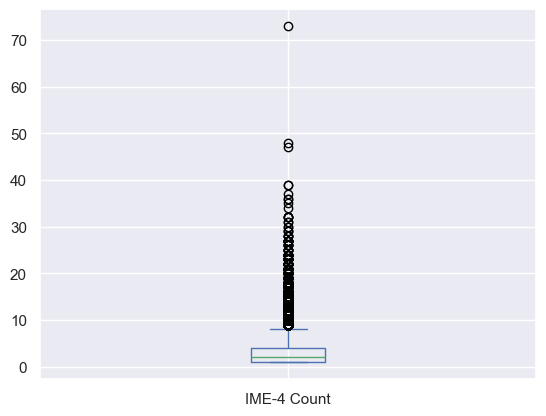

In [149]:
X_train_original['IME-4 Count'].plot(kind='box')

In [150]:
X_train_original[(X_train_original['IME-4 Count'] > 1)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
485114,2022-05-10,35,N,2022-06-25,Y,1097.00,1986,2022-07-14,2022-06-16,SIRIUSPOINT AMERICA INSURANCE,1,6023025,QUEENS,N,NYC,2022-08-29,M,4,31.0,MANUFACTURING,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11368,1.0,Not Work Related,2
354322,2021-05-19,41,N,2021-11-08,Y,623.35,1980,2021-11-08,2021-11-04,INDEMNITY INS. OF N AMERICA,1,5851908,MONROE,N,ROCHESTER,2023-03-24,F,2,31.0,MANUFACTURING,I,56.0,LIFTING,52.0,STRAIN OR TEAR,38.0,SHOULDER(S),14580,0.0,Not Work Related,3
401641,2022-02-03,58,N,2022-02-04,Y,1042.13,1963,2022-02-04,NaT,INDEMNITY INS. OF N AMERICA,1,5913931,ALBANY,N,ALBANY,2022-11-14,M,2,31.0,MANUFACTURING,I,32.0,ON ICE OR SNOW,49.0,SPRAIN OR TEAR,32.0,ELBOW,12065,0.0,Not Work Related,1
193398,2020-12-31,36,N,2021-01-27,Y,1070.03,0,2021-01-28,2021-01-19,CHARTER OAK FIRE INS CO,1,5644560,WESTCHESTER,N,NYC,2021-05-27,M,2,31.0,MANUFACTURING,NaN,56.0,LIFTING,16.0,DISLOCATION,22.0,DISC,33809,1.0,Not Work Related,2
345515,2021-10-18,30,N,2021-10-22,Y,1443.72,<NA>,2021-10-22,2022-01-12,ARCH INDEMNITY INSURANCE CO,1,5840959,SUFFOLK,N,HAUPPAUGE,2022-04-05,M,2,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",49.0,SPRAIN OR TEAR,34.0,WRIST,11713,0.0,Not Work Related,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273316,2021-06-13,26,N,2021-06-17,N,349.72,1994,2021-06-18,2021-06-15,GREAT AMERICAN ALLIANCE INS CO,1,5746287,ONONDAGA,N,SYRACUSE,NaT,F,2,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,57.0,PUSHING OR PULLING,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,13205,0.0,Not Work Related,2
12293,2020-01-18,36,N,2020-01-22,Y,1775.14,1983,2020-01-22,NaT,STATE INSURANCE FUND,2,5409665,CHEMUNG,N,BINGHAMTON,NaT,M,2,92.0,PUBLIC ADMINISTRATION,I,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,54.0,LOWER LEG,14904,0.0,Not Work Related,3
185617,2020-12-22,64,N,2021-01-12,Y,2706.32,1956,2021-01-12,2021-01-06,OLD REPUBLIC INSURANCE CO.,1,5635527,KINGS,N,NYC,NaT,F,2,31.0,MANUFACTURING,IV,29.0,ON SAME LEVEL,28.0,FRACTURE,34.0,WRIST,11224,0.0,Not Work Related,3
13616,2019-12-19,46,N,2020-01-24,Y,1100.00,<NA>,2020-05-20,2020-01-22,STATE INSURANCE FUND,2,5410997,SUFFOLK,N,HAUPPAUGE,2020-06-25,M,6,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,IV,75.0,FALLING OR FLYING OBJECT,49.0,SPRAIN OR TEAR,44.0,CHEST,11701,1.0,Not Work Related,5


Based on our research, we couldn't determine the exact number of IME-4 forms that can be attached to a claim. But we consider 72 - this dataset maximum number - to be an unrealistic value that may negatively affect our model. **For that reason, we decided to adjust these values by establishing a limit of 8, grounded in reasonable logic and in the visualization above, where 8 seems to be the last value not considered an outlier. Since in this case we only observe outliers in the upper limit, we think the best approach is to replace all values higher than 8 with the median, which is 2:**

In [151]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].apply(lambda x: 2 if x > 8 else x)

In [152]:
X_val['IME-4 Count'] = X_val['IME-4 Count'].apply(lambda x: 2 if x > 8 else x)

In [153]:
X_test['IME-4 Count'] = X_test['IME-4 Count'].apply(lambda x: 2 if x > 8 else x)

#### **Examining `Age at Injury` <> `Accident Date` <> `Birth Year`, parallelly:**

#### `Age at Injury`

In [154]:
X_train['Age at Injury'].describe()

count     401818.0
mean      42.10014
std      14.264173
min            0.0
25%           31.0
50%           42.0
75%           54.0
max          117.0
Name: Age at Injury, dtype: Float64

**Using plots to better understand the values in `Age at Injury`:**

<Axes: >

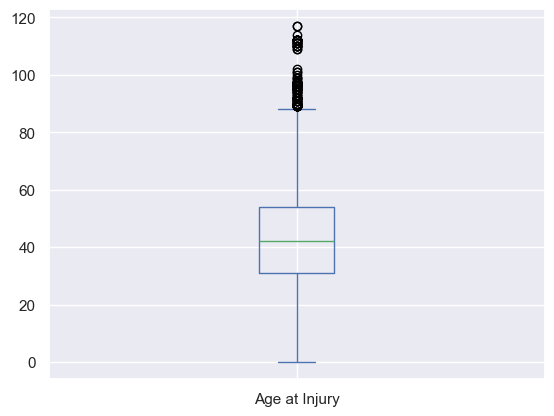

In [155]:
X_train['Age at Injury'].plot(kind='box')

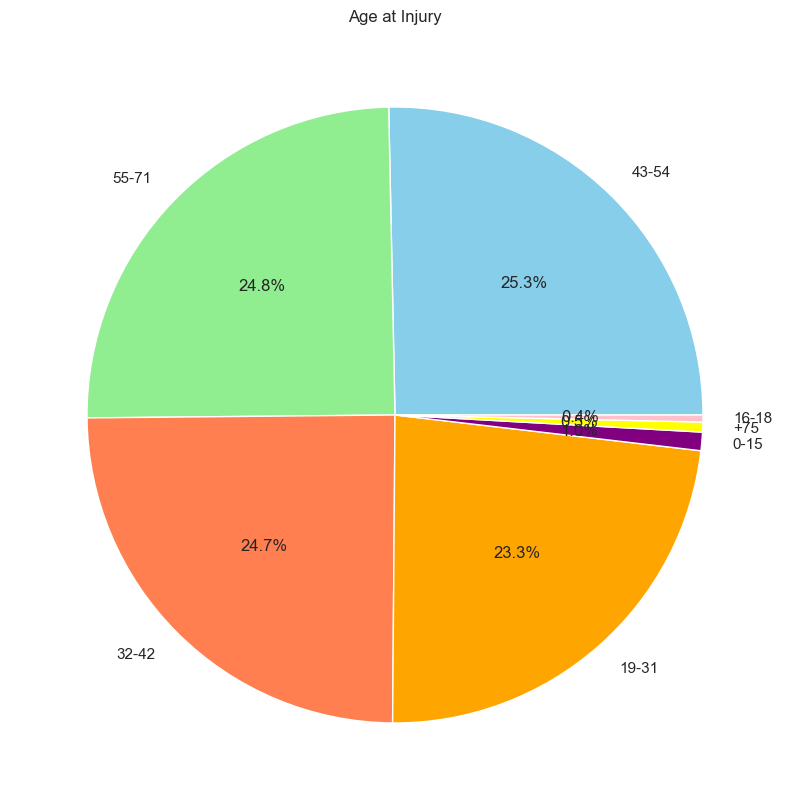

In [156]:
# Define age categories
bins = [0, 15, 18, 31, 42, 54, 75, 117]
labels = ['0-15', '16-18', '19-31', '32-42', '43-54', '55-71', '+75']

# Create a new column for age categories
train_data['Age Category'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels, right=False)
age_distribution = train_data['Age Category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(14, 10))  # Set the figure size

age_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'coral', 'orange', 'purple', 'yellow', 'pink'])

# Customize the plot
plt.title('Age at Injury')
plt.ylabel('')  # Remove the default y-label (which shows "Age Category")

# Show the plot
plt.show()

In nb0 we can see that `Age at Injury` has a few outliers. From the boxplot, it happears that anything below 0 (not possible) and above 85 (approximately) is considered an outlier. However, we have knowledge of the real world and we don't consider values like 14 or 83 reasonable for this variable, therefore we dug deeper to try to determine a decent interval of values that don't lose much information and still make sense.

**Outlier analysis:** <br>

error/strange values:
- 0-15 represent 1% of data, which is highly unlikely age for individuals to even be employed, let alone experience a work-related injury
- +75 represents 0,5% of data, which even though is a likely age to have injuries, it is unlikely to still be employed

To calculate the minimum and maximum ages at Injury, we can exclude the extreme 1% values on each end of the data, a standard approach for handling outliers:

In [157]:
lower_quantile = X_train['Age at Injury'].quantile(0.01)  # age 16
upper_quantile = X_train['Age at Injury'].quantile(0.995)  # age 75

**Transforming the most extreme 1% of data on each end:**

In [158]:
X_train['Age at Injury'] = X_train['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

In [159]:
X_val['Age at Injury'] = X_val['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

In [160]:
X_test['Age at Injury'] = X_test['Age at Injury'].clip(lower=lower_quantile, upper=upper_quantile)

### `Birth Year`

**We expect Birth Year to be the subtraction between 'Accident Date' year and 'Age at Injury', with ±1year rounding difference.** <br>
This doesn't happen in 23473 rows:
- 17441 where Birth Year=0
- 2470 rows where we imputed missing values of Accident Date with the median relating to Assembly Date, then influencing Birth Year
- 3562 rows, where we replaced ages lower than 16 and higher than 71 with respective bounds

In [161]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_train['Calculated Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_train['Birth Year Match'] = (X_train['Birth Year'] >= X_train['Calculated Birth Year'] - 1) & \
                                    (X_train['Birth Year'] <= X_train['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_train['Birth Year Match'].value_counts()

# Display the results
print("Birth Year matches Accident year - Age at Injury? - current dataset")
matches_count

Birth Year matches Accident year - Age at Injury? - current dataset


Birth Year Match
True     380243
False     21575
Name: count, dtype: Int64

In [162]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_train_original['Calculated Birth Year'] = X_train_original['Accident Date'].dt.year - X_train_original['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_train_original['Birth Year Match'] = (X_train_original['Birth Year'] >= X_train_original['Calculated Birth Year'] - 1) & \
                                    (X_train_original['Birth Year'] <= X_train_original['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_train_original['Birth Year Match'].value_counts()

# Display the results
print("Birth Year matches Accident year - Age at Injury? - original dataset:")
matches_count

Birth Year matches Accident year - Age at Injury? - original dataset:


Birth Year Match
True     361657
False     17441
Name: count, dtype: Int64

In [163]:
X_train_original[X_train_original['Birth Year Match'] == False][['Age at Injury', 'Accident Date', 'Birth Year']]
#originally, in all rows where Birth Year isn't the difference between accident date - age at injury, with 1 error margin, the Birth Year=0 (17441)
#but then, we force ages <16 and >71 to be 16 and 71, respectively, which adds to the count (3562)
#and we computed misisng values of accident date as median (+2470 rows)

,Age at Injury,Accident Date,Birth Year
189712,57,2021-01-19,0
193398,36,2020-12-31,0
350903,0,2021-09-09,0
327295,34,2021-09-13,0
299578,40,2021-04-14,0
...,...,...,...
85474,57,2020-06-17,0
116895,0,2020-08-10,0
401930,39,2022-01-19,0
468807,42,2022-04-05,0


In [164]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_val['Calculated Birth Year'] = X_val['Accident Date'].dt.year - X_val['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_val['Birth Year Match'] = (X_val['Birth Year'] >= X_val['Calculated Birth Year'] - 1) & \
                                    (X_val['Birth Year'] <= X_val['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_val['Birth Year Match'].value_counts()

In [165]:
# Calculate the expected 'Birth Year' by subtracting 'Age at Injury' from the 'Accident Date' year
X_test['Calculated Birth Year'] = X_test['Accident Date'].dt.year - X_test['Age at Injury']

# Now compare if the calculated 'Birth Year' is within ±1 of the 'Birth Year' in the dataset
X_test['Birth Year Match'] = (X_test['Birth Year'] >= X_test['Calculated Birth Year'] - 1) & \
                                    (X_test['Birth Year'] <= X_test['Calculated Birth Year'] + 1)

# Count how many True and False values there are
matches_count = X_test['Birth Year Match'].value_counts()

**To treat outliers of Birth Year we can replace 0 values with the subtraction between 'Accident Date' year and 'Age at Injury':**

In [166]:
X_train['Birth Year'] = X_train.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Match'] == False else x['Birth Year'], 
    axis=1)

In [167]:
X_val['Birth Year'] = X_val.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Match'] == False else x['Birth Year'], 
    axis=1)

In [168]:
X_test['Birth Year'] = X_test.apply(
    lambda x: x['Accident Date'].year - x['Age at Injury'] if x['Birth Year Match'] == False else x['Birth Year'], 
    axis=1)

Checking if the match is now true for every row, considering the ±1year rounding difference:

In [169]:
len(X_train[(X_train['Birth Year'] + X_train['Age at Injury'] >= X_train['Accident Date'].dt.year - 1) & 
        (X_train['Birth Year'] + X_train['Age at Injury'] <= X_train['Accident Date'].dt.year + 1)])

401818

Checking correct datatype:

In [170]:
X_train['Birth Year'].dtype

dtype('int64')

### `Average Weekly Wage`

In [171]:
X_train['Average Weekly Wage'].describe()

count    4.018180e+05
mean     5.253737e+02
std      7.034909e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.295575e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

After reviewing the handout description, we note that this dataset includes claims from volunteer workers in specified areas. Therefore, in some cases, an Average Weekly Wage of 0 is an acceptable value. <br>
Combining this insight with domain knowledge, we conclude that the industries where the specified volunteer work occurs are identified by Codes 56, 92, and 62. <br> Based on this, we assume that the Average Weekly Wage values for these industries are accurate and valid, even if 0.

In [172]:
# List of industry codes where no wage is acceptable - volunteer firefighters, ambulance drivers and other civil defense workers
zero_wage_ind = [56.0, 92.0, 62.0]

In [173]:
X_train[X_train['Average Weekly Wage'] == 0][['Industry Code','Industry Code Description']].value_counts()

Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               54141
92.0           PUBLIC ADMINISTRATION                                           30902
44.0           RETAIL TRADE                                                    29198
61.0           EDUCATIONAL SERVICES                                            21587
48.0           TRANSPORTATION AND WAREHOUSING                                  18531
31.0           MANUFACTURING                                                   15537
72.0           ACCOMMODATION AND FOOD SERVICES                                 12350
23.0           CONSTRUCTION                                                    10106
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     8352
42.0           WHOLESALE TRADE                                                  5753
81.0           OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)              

In [174]:
print("Total of cases by Industry Code where an average weekly wage of 0 is an acceptable number:")
X_train[(X_train['Average Weekly Wage'].notna()) & (X_train['Industry Code'].isin(zero_wage_ind))][['Industry Code', 'Industry Code Description']].value_counts()

Total of cases by Industry Code where an average weekly wage of 0 is an acceptable number:


Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               86849
92.0           PUBLIC ADMINISTRATION                                           64512
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT    14824
Name: count, dtype: int64

In [175]:
print("Of which, the cases in which the weekly wage is actually 0:")

X_train[(X_train['Average Weekly Wage'] == 0) & (X_train['Industry Code'].isin(zero_wage_ind))][['Industry Code', 'Industry Code Description']].value_counts()

Of which, the cases in which the weekly wage is actually 0:


Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               54141
92.0           PUBLIC ADMINISTRATION                                           30902
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT     8352
Name: count, dtype: int64

**Leaving the Industries where an Average Weekly Wage of 0 is an acceptable number unchanged, we treat all the others by imputing the previuously calculated Average Weekly Wage by Industry Code:**

In [176]:
# Replace 0 in 'Average Weekly Wage' column
X_train['Average Weekly Wage'] = X_train.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind 
    else industry_median_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1
)

In [177]:
# Replace 0 in 'Average Weekly Wage' column for X_val
X_val['Average Weekly Wage'] = X_val.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind 
    else industry_median_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1
)

In [178]:
# Replace 0 in 'Average Weekly Wage' column for X_test
X_test['Average Weekly Wage'] = X_test.apply(
    lambda row: row['Average Weekly Wage'] if row['Industry Code'] in zero_wage_ind 
    else industry_median_wage.get(row['Industry Code'], row['Average Weekly Wage'])
    if row['Average Weekly Wage'] == 0 else row['Average Weekly Wage'],
    axis=1
)

In [179]:
X_test[X_test['Average Weekly Wage'] == 0][['Industry Code','Industry Code Description']].value_counts()

Industry Code  Industry Code Description                                   
62.0           HEALTH CARE AND SOCIAL ASSISTANCE                               66502
92.0           PUBLIC ADMINISTRATION                                           42470
56.0           ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT    10835
Name: count, dtype: int64

We also verified that exist some significant extreme values. We decided to keep them, in order to preserve the information, but then we want to create a log feature.

### Outliers Summary:
We  treated outliers for:
- Age at Injury
- Birth Year
- Avg Weekly Wage=0
- IME-4 Count

## 2.4 Categorical Data <a name="24-categorical-data"></a>


In [180]:
X_train.describe(include=['object', 'category']).T

,count,unique,top,freq
Alternative Dispute Resolution,401818,2,N,399999
Attorney/Representative,401818,2,N,274690
Carrier Name,401818,1969,STATE INSURANCE FUND,77555
Carrier Type,401818,5,1,201152
County of Injury,401818,62,SUFFOLK,42269
COVID-19 Indicator,401818,2,N,382530
District Name,401818,8,NYC,189992
Gender,401818,3,M,238090
Industry Code Description,401818,20,HEALTH CARE AND SOCIAL ASSISTANCE,86849
Medical Fee Region,401818,4,IV,209852


In [181]:
unique = X_train.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique(), axis=0)
pd.set_option('display.max_colwidth', 100)  # No limit on column width
unique

Alternative Dispute Resolution                                                                                                    [N, Y]
Attorney/Representative                                                                                                           [N, Y]
Carrier Name                         [STATE INSURANCE FUND, SIRIUSPOINT AMERICA INSURANCE, INDEMNITY INS. OF N AMERICA, SECURITY NATI...
Carrier Type                                                                                                             [2, 1, 3, 4, 5]
County of Injury                     [CAYUGA, QUEENS, MONROE, ALBANY, KINGS, WESTCHESTER, JEFFERSON, NEW YORK, BROOME, NASSAU, CHEMUN...
COVID-19 Indicator                                                                                                                [N, Y]
District Name                                              [SYRACUSE, NYC, ROCHESTER, ALBANY, BINGHAMTON, HAUPPAUGE, BUFFALO, STATEWIDE]
Gender                                   

## Further Inspection

Data where Cause of Injury is COVID-19 but COVID-19 Indicator is 'N':

In [182]:
X_train[(X_train['WCIO Nature of Injury Description'] == 'COVID-19') & (X_train['COVID-19 Indicator']== 'N')]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery,Calculated Birth Year,Birth Year Match
356565,2021-10-31,16,N,2021-11-10,Y,2508.72,2005,2021-11-15,STATE INSURANCE FUND,2,5854179,SUFFOLK,N,HAUPPAUGE,M,0,92.0,PUBLIC ADMINISTRATION,IV,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,11743,0.0,Not Work Related,6,1,1,2005,False
253867,2021-05-03,16,N,2021-05-13,Y,0.00,2005,2021-05-21,AMERICAN ZURICH INSURANCE CO,1,5721505,WESTCHESTER,N,NYC,F,0,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT,III,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10502,1.0,Not Work Related,5,1,1,2005,False
376677,2021-12-07,16,N,2021-12-17,N,0.00,2005,2021-12-23,HARTFORD FIRE INSURANCE CO,1,5879910,KINGS,N,NYC,M,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,99.0,WHOLE BODY,11206,0.0,Not Work Related,4,0,1,2005,False
333495,2021-09-21,16,N,2021-10-01,Y,0.00,2005,2021-10-22,TRINITY HEALTH CORPORATION,4,5823482,RENSSELAER,N,ALBANY,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,12182,0.0,Not Work Related,0,0,1,2005,False
180481,2020-12-21,16,N,2020-12-31,N,0.00,2004,2021-02-10,STATE INSURANCE FUND,2,5627033,SULLIVAN,N,ALBANY,F,0,92.0,PUBLIC ADMINISTRATION,I,99.0,"OTHER - MISCELLANEOUS, NOC",83.0,COVID-19,60.0,LUNGS,12754,0.0,Not Work Related,0,0,1,2004,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194205,2021-01-18,16,N,2021-01-28,N,973.31,2005,2021-02-05,AMERICAN CASUALTY CO OF,1,5645503,KINGS,N,NYC,M,0,31.0,MANUFACTURING,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11203,0.0,Not Work Related,1,0,1,2005,False
122322,2020-08-24,16,N,2020-09-03,Y,1961.91,2004,2020-09-15,AIU INSURANCE CO,1,5550998,ORANGE,N,ALBANY,F,2,51.0,INFORMATION,III,83.0,PANDEMIC,83.0,COVID-19,60.0,LUNGS,10941,0.0,Not Work Related,0,1,1,2004,False
266062,2021-05-28,16,N,2021-06-07,Y,0.00,2005,2022-03-25,HEALTH & HOSPITAL CORP.,3,5738316,KINGS,N,NYC,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,48.0,INTERNAL ORGANS,11693,0.0,Not Work Related,1,0,1,2005,False
91035,2020-06-27,16,N,2020-07-07,Y,0.00,2004,2020-11-07,LIBERTY MUTUAL FIRE INS CO,1,5510707,SUFFOLK,N,HAUPPAUGE,F,0,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,IV,83.0,PANDEMIC,83.0,COVID-19,91.0,BODY SYSTEMS AND MULTIPLE BODY SYSTEMS,11703,1.0,Not Work Related,2,1,1,2004,False


**Select dataset where 'Cause of Injury' is 'Covid-19' but 'Covid-19 Indicator' is 'N', and update those values for 'Y':**

In [183]:
covid_no_match = (X_train['WCIO Nature of Injury Description'] == 'COVID-19') & (X_train['COVID-19 Indicator'] == 'N')

In [184]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_train.loc[covid_no_match, 'COVID-19 Indicator'] = 'Y'

**Do the same in val and test dataset:**

In [185]:
covid_no_match_val = (X_val['WCIO Nature of Injury Description'] == 'COVID-19') & (X_val['COVID-19 Indicator'] == 'N')

In [186]:
covid_no_match_test = (X_test['WCIO Nature of Injury Description'] == 'COVID-19') & (X_test['COVID-19 Indicator'] == 'N')

In [187]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_val.loc[covid_no_match_val, 'COVID-19 Indicator'] = 'Y'

In [188]:
# Update 'COVID-19 Indicator' to 'Y' for these rows
X_test.loc[covid_no_match_test, 'COVID-19 Indicator'] = 'Y'

**Doublecheck results:**

In [189]:
X_train[(X_train['WCIO Nature of Injury Description'] == 'COVID-19') & (X_train['COVID-19 Indicator'] == 'N')]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,Carrier Name,Carrier Type,Claim Identifier,County of Injury,COVID-19 Indicator,District Name,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents,First Hearing,C-3 Delivery,Calculated Birth Year,Birth Year Match


### Summary of Categorical Data

can become binary: <br>
`Attorney/Representative` <br>
`COVID-19 Indicator` <br>
`WCB Decision` <br>
`Alternative Dispute Resolution`  <br>
`Gender` - there are 45 non binary, which could be interpreted as 0 - not male

could be represented by numbers instead of strings : <br>
`Medical Fee Region` <br>

## 2.5 Feature Engineering <a name="25-feature-engineering"></a>


In [190]:
X_val.dtypes

Accident Date                        datetime64[ns]
Age at Injury                                 Int64
Alternative Dispute Resolution               object
Assembly Date                        datetime64[ns]
Attorney/Representative                      object
Average Weekly Wage                         float64
Birth Year                                    int64
C-2 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Identifier                              int64
County of Injury                             object
COVID-19 Indicator                           object
District Name                                object
Gender                                       object
IME-4 Count                                   int64
Industry Code                               float64
Industry Code Description                    object
Medical Fee Region                           object
WCIO Cause o

### `Step 1` Creating new features

**`By intrepreting existing features differently`**

`Days from Accident to C-2`

This variable represents the number of days that it took to receive the employer report since the accident happened.

In [191]:
X_train['Days from Accident to C-2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days.astype('Int64')
X_val['Days from Accident to C-2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days.astype('Int64')
X_test['Days from Accident to C-2'] = (X_test['C-2 Date'] - X_test['Accident Date']).dt.days.astype('Int64')

In [192]:
X_train['Days from Accident to C-2'].isna().sum()

0

In [193]:
X_train['Days from Accident to C-2'].describe()

count      401818.0
mean       77.94601
std      552.881443
min         -8842.0
25%             5.0
50%            10.0
75%            29.0
max         21439.0
Name: Days from Accident to C-2, dtype: Float64

`Days from Accident to Assembly`

This variable represents the number of days that it took to first assemble the claim since the accident happened.

In [194]:
X_train['Days from Accident to Assembly'] = (X_train['Assembly Date'] - X_train['Accident Date']).dt.days.astype('Int64')

In [195]:
X_val['Days from Accident to Assembly'] = (X_val['Assembly Date'] - X_val['Accident Date']).dt.days.astype('Int64')

In [196]:
X_test['Days from Accident to Assembly'] = (X_test['Assembly Date'] - X_test['Accident Date']).dt.days.astype('Int64')

`Log Average Weekly Wage`

As mentioned before, we will transform this variable in its logarithm, in order to to normalize the distribution, reduce skewness, and handle outliers effectively.
We add +1 to the Log Average Weekly Wage before applying the logarithmic transformation to handle zero values, ensuring all inputs to the logarithm are positive and avoiding undefined results.

In [197]:
X_train['Log_Average_Weekly_Wage'] = np.log(X_train['Average Weekly Wage'] + 1)

In [198]:
X_val['Log_Average_Weekly_Wage'] = np.log(X_val['Average Weekly Wage'] + 1)

In [199]:
X_test['Log_Average_Weekly_Wage'] = np.log(X_test['Average Weekly Wage'] + 1)

`Age Group`

Categorizing Age at Injury into age groups allows us to capture potential patterns and trends in injuries across different life stages, providing valuable insights for targeted prevention strategies and resource allocation.

In [200]:
# Define age groups based on Age at Injury
def assign_age_group(age):
    if 16 <= age <= 19:
        return 'Teenagers'
    elif 20 <= age <= 29:
        return 'Young Adults'
    elif 30 <= age <= 45:
        return 'Middle Adults'
    elif 46 <= age <= 59:
        return 'Mature Adults'
    elif 60 <= age <= 65:
        return 'Pre-Seniors'
    elif 66 <= age <= 75:
        return 'Seniors'
    else:
        return 'Unknown'

In [201]:
X_train['Age_Group'] = X_train['Age at Injury'].apply(assign_age_group)

In [202]:
X_val['Age_Group'] = X_val['Age at Injury'].apply(assign_age_group)

In [203]:
X_test['Age_Group'] = X_test['Age at Injury'].apply(assign_age_group)

`Claim Antiguity`

In [204]:
X_train['Claim Antiguity'] = X_train['Claim Identifier'].rank(method = 'dense').astype(int)

In [205]:
X_val['Claim Antiguity'] = X_val['Claim Identifier'].rank(method = 'dense').astype(int)

In [206]:
X_test['Claim Antiguity'] = X_test['Claim Identifier'].rank(method = 'dense').astype(int)

 **To capture insights not present in dataset**

`C-2 under Deadline`, a binary outcome feature where:
- 0=  no, it was delivered over the deadline,
- 1= yes, it was delivered under the deadline and
- error means form was delivered before there was an accident

We base the information about deadlines on the research done, considering it domain knowledge:
- C-2 Form: 10 days after Accident Date

In [207]:
X_train['C-2 under Deadline'] = X_train['Days from Accident to C-2'].apply(
    lambda x: 1 if (x >= 0 and x <= 10) else 0)

In [208]:
X_val['C-2 under Deadline'] = X_val['Days from Accident to C-2'].apply(
    lambda x: 1 if (x >= 0 and x <= 10) else 0)

In [209]:
X_test['C-2 under Deadline'] = X_test['Days from Accident to C-2'].apply(
    lambda x: 1 if (x >= 0 and x <= 10) else 0)

In [210]:
X_train['C-2 under Deadline'].value_counts()

C-2 under Deadline
1    205334
0    196484
Name: count, dtype: int64

`Forms Delivered Count`

Count with the number of forms delivered for the claim file (IME-4 and C-3)

In [211]:
X_train['Forms Delivered Count'] = X_train['C-3 Delivery'] + X_train['IME-4 Count']

In [212]:
X_val['Forms Delivered Count'] = X_val['C-3 Delivery'] + X_val['IME-4 Count']

In [213]:
X_test['Forms Delivered Count'] = X_test['C-3 Delivery'] + X_test['IME-4 Count']

In [214]:
X_train['Forms Delivered Count'].value_counts()

Forms Delivered Count
0    246901
1     70224
2     27422
3     24504
4     10840
5      8365
6      5099
7      4035
8      2648
9      1780
Name: count, dtype: Int64

`Validity of Claim`, a binary outcome variable that determines whether or not the claim files is valid, by checking that:
- all mandatory forms were delivered
- from accident date to c-3 form, there is a logical sequence

In [215]:
X_train['Valid Full Claim'] = (
    (X_train_original['Accident Date'] <= X_train_original['C-2 Date']) & 
    (X_train['C-2 under Deadline'] == 1) & 
    (X_train['C-3 Delivery'] == 1)).apply(lambda x: 1 if x is True else 0)

In [216]:
X_val['Valid Full Claim'] = (
    (X_val_original['Accident Date'] <= X_val_original['C-2 Date']) & 
    (X_val['C-2 under Deadline'] == 1) & 
    (X_val['C-3 Delivery'] == 1)).apply(lambda x: 1 if x is True else 0)

In [217]:
X_test['Valid Full Claim'] = (
    (X_test_original['Accident Date'] <= X_test_original['C-2 Date']) & 
    (X_test['C-2 under Deadline'] == 1) & 
    (X_test['C-3 Delivery'] == 1)).apply(lambda x: 1 if x is True else 0)

In [218]:
X_train['Valid Full Claim'].value_counts()

Valid Full Claim
0    353238
1     48580
Name: count, dtype: int64

**`Rearranging categories in features into meaningful groups`**

In [219]:
train_data['WCIO Cause of Injury Description'].unique()

array(['FROM LIQUID OR GREASE SPILLS', 'REPETITIVE MOTION',
       'OBJECT BEING LIFTED OR HANDLED',
       'HAND TOOL, UTENSIL; NOT POWERED', 'FALL, SLIP OR TRIP, NOC',
       'CUT, PUNCTURE, SCRAPE, NOC', 'OTHER - MISCELLANEOUS, NOC',
       'STRUCK OR INJURED, NOC', 'FALLING OR FLYING OBJECT', 'CHEMICALS',
       'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE', 'LIFTING',
       'TWISTING', 'ON SAME LEVEL', 'STRAIN OR INJURY BY, NOC',
       'MOTOR VEHICLE, NOC', 'FROM DIFFERENT LEVEL (ELEVATION)',
       'PUSHING OR PULLING', 'FOREIGN MATTER (BODY) IN EYE(S)',
       'FELLOW WORKER, PATIENT OR OTHER PERSON', 'STEAM OR HOT FLUIDS',
       'STATIONARY OBJECT', 'ON ICE OR SNOW',
       'ABSORPTION, INGESTION OR INHALATION, NOC',
       'PERSON IN ACT OF A CRIME', 'INTO OPENINGS', 'ON STAIRS',
       'FROM LADDER OR SCAFFOLDING', 'SLIP, OR TRIP, DID NOT FALL',
       'JUMPING OR LEAPING', 'MOTOR VEHICLE', 'RUBBED OR ABRADED, NOC',
       'REACHING', 'OBJECT HANDLED', 'HOT OBJECTS OR SUBS

In [220]:
train_data['WCIO Part Of Body Description'].unique()

array(['BUTTOCKS', 'SHOULDER(S)', 'MULTIPLE HEAD INJURY', 'FINGER(S)',
       'LUNGS', 'EYE(S)', 'ANKLE', 'KNEE', 'THUMB', 'LOWER BACK AREA',
       'ABDOMEN INCLUDING GROIN', 'LOWER LEG', 'HIP', 'UPPER LEG',
       'MOUTH', 'WRIST', 'SPINAL CORD', 'HAND', 'SOFT TISSUE',
       'UPPER ARM', 'FOOT', 'ELBOW', 'MULTIPLE UPPER EXTREMITIES',
       'MULTIPLE BODY PARTS (INCLUDING BODY',
       'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS', 'MULTIPLE NECK INJURY',
       'CHEST', 'WRIST (S) & HAND(S)', 'EAR(S)',
       'MULTIPLE LOWER EXTREMITIES', 'DISC', 'LOWER ARM', 'MULTIPLE',
       'UPPER BACK AREA', 'SKULL', 'TOES', 'FACIAL BONES', nan, 'TEETH',
       'NO PHYSICAL INJURY', 'MULTIPLE TRUNK', 'WHOLE BODY',
       'INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED', 'PELVIS',
       'NOSE', 'GREAT TOE', 'INTERNAL ORGANS', 'HEART', 'VERTEBRAE',
       'LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA', 'BRAIN',
       'SACRUM AND COCCYX', 'ARTIFICIAL APPLIANCE', 'LARYNX', 'TRACHEA'],
      dtype=ob

In [221]:
train_data['WCIO Nature of Injury Description'].unique()

array(['CONTUSION', 'SPRAIN OR TEAR', 'CONCUSSION', 'PUNCTURE',
       'LACERATION', 'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC',
       'ALL OTHER SPECIFIC INJURIES, NOC', 'INFLAMMATION', 'BURN',
       'STRAIN OR TEAR', 'FRACTURE', 'FOREIGN BODY',
       'MULTIPLE PHYSICAL INJURIES ONLY', 'RUPTURE', 'DISLOCATION',
       'ALL OTHER CUMULATIVE INJURY, NOC', 'HERNIA', 'ANGINA PECTORIS',
       'CARPAL TUNNEL SYNDROME', 'NO PHYSICAL INJURY', nan, 'INFECTION',
       'CRUSHING', 'SYNCOPE', 'POISONING - GENERAL (NOT OD OR CUMULATIVE',
       'RESPIRATORY DISORDERS', 'HEARING LOSS OR IMPAIRMENT',
       'MENTAL STRESS', 'SEVERANCE', 'ELECTRIC SHOCK', 'LOSS OF HEARING',
       'DUST DISEASE, NOC', 'DERMATITIS', 'ASPHYXIATION',
       'MENTAL DISORDER', 'CONTAGIOUS DISEASE', 'AMPUTATION',
       'MYOCARDIAL INFARCTION',
       'POISONING - CHEMICAL, (OTHER THAN METALS)',
       'MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL',
       'VISION LOSS', 'VASCULAR', 'COVID-19', 'CANC

In [222]:
train_data['Industry Code Description'].unique()

array(['RETAIL TRADE', 'CONSTRUCTION',
       'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
       'HEALTH CARE AND SOCIAL ASSISTANCE',
       'ACCOMMODATION AND FOOD SERVICES', 'EDUCATIONAL SERVICES',
       'INFORMATION', 'MANUFACTURING', 'TRANSPORTATION AND WAREHOUSING',
       'WHOLESALE TRADE', 'REAL ESTATE AND RENTAL AND LEASING',
       'FINANCE AND INSURANCE',
       'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
       'PUBLIC ADMINISTRATION',
       'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
       'ARTS, ENTERTAINMENT, AND RECREATION', nan, 'UTILITIES',
       'AGRICULTURE, FORESTRY, FISHING AND HUNTING', 'MINING',
       'MANAGEMENT OF COMPANIES AND ENTERPRISES'], dtype=object)

In [223]:
# Injury groups for Cause of Injury
cause_of_injury_groups = {
    "Environmental Hazards": [
        "ABNORMAL AIR PRESSURE", "COLD OBJECTS OR SUBSTANCES", "TEMPERATURE EXTREMES", 
        "NATURAL DISASTERS", "RADIATION", "CONTINUAL NOISE"
    ],
    "Animal or Insect": ["ANIMAL OR INSECT"],
    "Chemical Exposure": [
        "CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "EXPLOSION OR FLARE BACK", 
        "FIRE OR FLAME", "MOLD", "STEAM OR HOT FLUIDS"
    ],
    "Falls and Slips": [
        "FALL, SLIP OR TRIP, NOC", "FROM DIFFERENT LEVEL (ELEVATION)", 
        "FROM LADDER OR SCAFFOLDING", "FROM LIQUID OR GREASE SPILLS", 
        "ON ICE OR SNOW", "ON SAME LEVEL", "ON STAIRS", "SLIP, OR TRIP, DID NOT FALL"
    ],
    "Struck or Hit": [
        "STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", 
        "HAND TOOL OR MACHINE IN USE", "MOVING PART OF MACHINE", 
        "POWERED HAND TOOL, APPLIANCE", "WIELDING OR THROWING"
    ],
    "Lifting or Carrying": ["LIFTING", "HOLDING OR CARRYING", "OBJECT BEING LIFTED OR HANDLED"],
    "Motor Vehicle": [
        "MOTOR VEHICLE", "COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", 
        "COLLISION WITH A FIXED OBJECT", "VEHICLE UPSET"
    ],
    "Repetitive Motion": ["REPETITIVE MOTION", "TWISTING", "PUSHING OR PULLING", "REACHING"],
    "Cut or Abrasion": ["CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC"],
    "Contact with Object": [
        "HAND TOOL, UTENSIL; NOT POWERED", "OBJECT HANDLED", "HOT OBJECTS OR SUBSTANCES", 
        "STRIKING AGAINST OR STEPPING ON, NOC", "MACHINE OR MACHINERY", "BROKEN GLASS", 
        "STEPPING ON SHARP OBJECT", "OBJECT HANDLED BY OTHERS"
    ],
    "Caught In or Between": ["CAUGHT IN, UNDER OR BETWEEN, NOC", "MOVING PARTS OF MACHINE"],
    "Other Causes": [
        "FOREIGN MATTER (BODY) IN EYE(S)", "PERSON IN ACT OF A CRIME", "INTO OPENINGS", 
        "JUMPING OR LEAPING", "ELECTRICAL CURRENT", "USING TOOL OR MACHINERY", 
        "SANDING, SCRAPING, CLEANING OPERATION", "OTHER THAN PHYSICAL CAUSE OF INJURY", 
        "CONTACT WITH, NOC", "CUMULATIVE, NOC", "WELDING OPERATION", 
        "COLLAPSING MATERIALS (SLIDES OF EARTH)", "CRASH OF RAIL VEHICLE", 
        "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE"
    ],
    "Miscellaneous": ["OTHER - MISCELLANEOUS, NOC", "TERRORISM", "PANDEMIC", "GUNSHOT"]
}

# Define a function to map each value to a group
def map_column_to_group(column_value, group_mapping):
    if pd.isna(column_value):
        return "Unknown"
    for group, values in group_mapping.items():
        if column_value in values:
            return group
    return "Other Causes"

# Map the injury cause in X_train, X_val, and X_test
X_train['Injury Group'] = X_train['WCIO Cause of Injury Description'].apply(
    lambda x: map_column_to_group(x, cause_of_injury_groups)
)
X_val['Injury Group'] = X_val['WCIO Cause of Injury Description'].apply(
    lambda x: map_column_to_group(x, cause_of_injury_groups)
)
X_test['Injury Group'] = X_test['WCIO Cause of Injury Description'].apply(
    lambda x: map_column_to_group(x, cause_of_injury_groups)
)

In [224]:
# Body parts groups
body_part_groups = {
    "Upper Extremities": [
        "FINGER(S)", "HAND", "THUMB", "WRIST", "ELBOW", "SHOULDER(S)", 
        "UPPER ARM", "MULTIPLE UPPER EXTREMITIES", "WRIST (S) & HAND(S)"
    ],
    "Lower Extremities": [
        "ANKLE", "KNEE", "LOWER LEG", "FOOT", "TOES", "GREAT TOE", 
        "LOWER ARM", "UPPER LEG", "MULTIPLE LOWER EXTREMITIES", "HIP"
    ],
    "Head & Neck": [
        "BRAIN", "SKULL", "FACE", "EYE(S)", "EAR(S)", "TEETH", 
        "NOSE", "MOUTH", "LARYNX", "TRACHEA", "NECK", 
        "MULTIPLE HEAD INJURY", "MULTIPLE NECK INJURY", "FACIAL BONES"
    ],
    "Torso": [
        "CHEST", "PELVIS", "ABDOMEN INCLUDING GROIN", "LOWER BACK AREA", 
        "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA)", "INTERNAL ORGANS", 
        "SACRUM AND COCCYX", "UPPER BACK AREA", "MULTIPLE TRUNK", "DISC", "VERTEBRAE"
    ],
    "Other": [
        "SOFT TISSUE", "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED", 
        "NO PHYSICAL INJURY", "WHOLE BODY", "ARTIFICIAL APPLIANCE", 
        "BODY SYSTEMS AND MULTIPLE BODY SYSTEMS", "MULTIPLE BODY PARTS (INCLUDING BODY)", 
        "MULTIPLE"
    ],
    "Lungs & Heart": ["LUNGS", "HEART"],
    "Buttocks": ["BUTTOCKS"],
    "Spinal Cord": ["SPINAL CORD"]
}

# Define a function to map each value to a group
def map_column_to_group(column_value, group_mapping):
    if pd.isna(column_value):
        return "Unknown"
    for group, values in group_mapping.items():
        if column_value in values:
            return group
    return "Other"

# Map the body part in X_train, X_val, and X_test
X_train['Body Part Group'] = X_train['WCIO Part Of Body Description'].apply(
    lambda x: map_column_to_group(x, body_part_groups)
)
X_val['Body Part Group'] = X_val['WCIO Part Of Body Description'].apply(
    lambda x: map_column_to_group(x, body_part_groups)
)
X_test['Body Part Group'] = X_test['WCIO Part Of Body Description'].apply(
    lambda x: map_column_to_group(x, body_part_groups)
)

In [225]:
nature_of_injury_groups = {
    "Cumulative and Occupational": [
        "ALL OTHER CUMULATIVE INJURY, NOC", "BYSSINOSIS", "BLACK LUNG", "CARPAL TUNNEL SYNDROME",
        "DUST DISEASE, NOC", "SILICOSIS", "HEPATITIS C"
    ],
    "Physical Injuries": [
        "AMPUTATION", "ASBESTOSIS", "ASPHYXIATION", "BURN", "CONTUSION", "CRUSHING", "DISLOCATION",
        "FRACTURE", "FREEZING", "LACERATION", "MENTAL DISORDER", "MENTAL STRESS", "MYOCARDIAL INFARCTION",
        "POISONING - CHEMICAL", "POISONING - METAL", "PUNCTURE", "RESPIRATORY DISORDERS", "RUPTURE", "SEVERANCE",
        "SPRAIN OR TEAR", "STRAIN OR TEAR", "ELECTRIC SHOCK", "HEAT PROSTRATION", "MULTIPLE PHYSICAL INJURIES ONLY",
        "FOREIGN BODY", "HERNIA", "LOSS OF HEARING", "HEARING LOSS OR IMPAIRMENT", 
        "POISONING - GENERAL (NOT OD OR CUMULATIVE)"
    ],
    "Infection and Diseases": [
        "CONTAGIOUS DISEASE", "COVID-19", "INFECTION", "INFLAMMATION", "VISION LOSS"
    ],
    "Medical Reactions and Environmental Factors": [
        "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "RADIATION"
    ],
    "Chronic and Systemic Diseases": [
        "CANCER", "AIDS", "VASCULAR"
    ],
    "Others": [
        "NO PHYSICAL INJURY", "VDT - RELATED DISEASES", "SYNCOPE", "ENUCLEATION"
    ]
}

# Map the nature of injury in X_train
X_train['Nature of Injury Group'] = X_train['WCIO Nature of Injury Description'].apply(lambda x: map_column_to_group(x, nature_of_injury_groups))
X_val['Nature of Injury Group'] = X_val['WCIO Nature of Injury Description'].apply(lambda x: map_column_to_group(x, nature_of_injury_groups))
X_test['Nature of Injury Group'] = X_test['WCIO Nature of Injury Description'].apply(lambda x: map_column_to_group(x, nature_of_injury_groups))


# Count occurrences of each nature of injury group
nature_of_injury_group_counts = X_train['Nature of Injury Group'].value_counts()

# Output the nature of injury group counts for X_train
print("Nature of Injury Group counts for X_train:")
print(nature_of_injury_group_counts)

Nature of Injury Group counts for X_train:
Nature of Injury Group
Physical Injuries                              331907
Other                                           32146
Infection and Diseases                          28135
Others                                           5208
Cumulative and Occupational                      4009
Chronic and Systemic Diseases                     268
Medical Reactions and Environmental Factors       145
Name: count, dtype: int64


In [226]:
industry_groups = {
    "Agriculture & Environment": [
        "AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING"
    ],
    "Construction": ["CONSTRUCTION"],
    "Healthcare": ["HEALTH CARE AND SOCIAL ASSISTANCE"],
    "Education" : ["EDUCATIONAL SERVICES"],
    "Retail & Services": ["RETAIL TRADE", "WHOLESALE TRADE", "ACCOMMODATION AND FOOD SERVICES", "FINANCE AND INSURANCE", "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)"],
    "Technology & Transport": [
        "TRANSPORTATION AND WAREHOUSING", "INFORMATION", "MANAGEMENT OF COMPANIES AND ENTERPRISES",
        "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES"
    ],
    "Manufacturing": ["MANUFACTURING"],
    "Public & Government": [
        "PUBLIC ADMINISTRATION", "REAL ESTATE AND RENTAL AND LEASING", "ARTS, ENTERTAINMENT, AND RECREATION",
        "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT"
    ],
    "Energy & Utilities": ["UTILITIES"]
}

# Map the industry in X_train
X_train['Industry Group'] = X_train['Industry Code Description'].apply(lambda x: map_column_to_group(x, industry_groups))
X_val['Industry Group'] = X_val['Industry Code Description'].apply(lambda x: map_column_to_group(x, industry_groups))
X_test['Industry Group'] = X_test['Industry Code Description'].apply(lambda x: map_column_to_group(x, industry_groups))

# Count occurrences of each industry group
industry_group_counts = X_train['Industry Group'].value_counts()

# Output the industry group counts for X_train
print("Industry Group counts for X_train:")
print(industry_group_counts)

Industry Group counts for X_train:
Industry Group
Public & Government          92576
Retail & Services            87428
Healthcare                   86849
Technology & Transport       51233
Education                    31054
Manufacturing                26869
Construction                 21581
Agriculture & Environment     2157
Energy & Utilities            2071
Name: count, dtype: int64


### `Step 2`  Transforming Existing Features:

**`By extracting a part of its information`**

In [227]:
# List of date columns to modify
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']

In [228]:
# Extract only the year and month for each column and convert to Int64
for col in date_columns:
    X_train[f'{col} Year'] = pd.to_datetime(X_train[col], errors='coerce').dt.year.astype('Int64')
    X_train[f'{col} Month'] = pd.to_datetime(X_train[col], errors='coerce').dt.month.astype('Int64')
    X_val[f'{col} Year'] = pd.to_datetime(X_val[col], errors='coerce').dt.year.astype('Int64')
    X_val[f'{col} Month'] = pd.to_datetime(X_val[col], errors='coerce').dt.month.astype('Int64')
    X_test[f'{col} Year'] = pd.to_datetime(X_test[col], errors='coerce').dt.year.astype('Int64')
    X_test[f'{col} Month'] = pd.to_datetime(X_test[col], errors='coerce').dt.month.astype('Int64')

In [229]:
# Renaming columns
X_train.rename(columns={
    'Accident Date Year': 'Accident Year',
    'Accident Date Month': 'Accident Month',
    'Assembly Date Year': 'Assembly Year',
    'Assembly Date Month': 'Assembly Month',
    'C-2 Date Year': 'C-2 Year',
    'C-2 Date Month': 'C-2 Month'}, inplace=True)

In [230]:
# Renaming columns
X_val.rename(columns={
    'Accident Date Year': 'Accident Year',
    'Accident Date Month': 'Accident Month',
    'Assembly Date Year': 'Assembly Year',
    'Assembly Date Month': 'Assembly Month',
    'C-2 Date Year': 'C-2 Year',
    'C-2 Date Month': 'C-2 Month'}, inplace=True)

In [231]:
# Renaming columns
X_test.rename(columns={
    'Accident Date Year': 'Accident Year',
    'Accident Date Month': 'Accident Month',
    'Assembly Date Year': 'Assembly Year',
    'Assembly Date Month': 'Assembly Month', 
    'C-2 Date Year': 'C-2 Year',
    'C-2 Date Month': 'C-2 Month'}, inplace=True)

**`By Changing its nature`**

**Turn Alternative Dispute Resolution, Attorney/Representative' and 'COVID-19 Indicator' into a binary outcome feature, where Y=1 and N=0:**

In [232]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_train[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_train[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

In [233]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_val[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_val[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

In [234]:
# Substituir 'N' por 0 e 'Y' por 1 em variáveis específicas
X_test[['Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator']] = X_test[['Alternative Dispute Resolution','Attorney/Representative', 'COVID-19 Indicator']].replace({'N': 0, 'Y': 1})

**Turn WCB Decision into binary, where 0=Not Work Related and 1=Work Related:**

In [235]:
X_train['WCB Decision'] = X_train['WCB Decision'].apply(lambda x: 0 if x == 'Not Work Related' else 1)

In [236]:
X_val['WCB Decision'] = X_val['WCB Decision'].apply(lambda x: 0 if x == 'Not Work Related' else 1)

**Turn Gender into binary, where 0=not male and 1=Male:**

We believe that keeping the non binary will not be relevnat to the model, since the amount of non binary individuals is not significant.

In [237]:
X_train['Gender'] = X_train['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [238]:
X_val['Gender'] = X_val['Gender'].apply(lambda x: 1 if x == 'M' else 0)

In [239]:
X_test['Gender'] = X_test['Gender'].apply(lambda x: 1 if x == 'M' else 0)

**`Changing from string to numeric representation`**

**Turn Medical Fee Region into numeric:**

In [240]:
X_train['Medical Fee Region'] = X_train['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

In [241]:
X_val['Medical Fee Region'] = X_val['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

In [242]:
X_test['Medical Fee Region'] = X_test['Medical Fee Region'].replace({'I':1, 'II':2, 'IV':4, 'III':3})

### `Step 3` Discarding/Dropping Features

**`Features that will not be on test environment`**

These features give us information that are unknown at the start of a claim, according to our Handout Descriptive .
For that reason, it is useless to train our model with information that we shouldn't have available for future predictions, as well as they don't show a relevant variance.

In [243]:
X_train = X_train.drop(['WCB Decision','Agreement Reached'], axis=1, errors='ignore')
X_val = X_val.drop(['WCB Decision','Agreement Reached'], axis=1, errors='ignore')
X_test = X_test.drop(['WCB Decision','Agreement Reached'], axis=1, errors='ignore')

**`Descriptive columns that have a corresponding code`**

We already have the corresponding code for each of this features, which makes keeping both unnecessary.
We chose to drop Description and keep Code, for the fact that it is easier to work with numbers.

In [244]:
columns_to_drop =X_train.columns[X_train.columns.str.endswith('Description')]
columns_to_drop

Index(['Industry Code Description', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Description'],
      dtype='object')

In [245]:
X_train = X_train.drop(columns=columns_to_drop)
X_val = X_val.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

**`Features created for analysis or already modified/transformed`**

We created and transformed all columns needed based on dates, we can now drop date time attributes. <br>
Dates are difficult to encode, and in some cases, the count of null values is too dominant for an effective imputation. Besides, we already extracted its useful information by creating new features.
Same for columns created for analysis:

In [246]:
X_train.isna().sum()

Accident Date                     0
Age at Injury                     0
Alternative Dispute Resolution    0
Assembly Date                     0
Attorney/Representative           0
Average Weekly Wage               0
Birth Year                        0
C-2 Date                          0
Carrier Name                      0
Carrier Type                      0
Claim Identifier                  0
County of Injury                  0
COVID-19 Indicator                0
District Name                     0
Gender                            0
IME-4 Count                       0
Industry Code                     0
Medical Fee Region                0
WCIO Cause of Injury Code         0
WCIO Nature of Injury Code        0
WCIO Part Of Body Code            0
Zip Code                          0
Number of Dependents              0
First Hearing                     0
C-3 Delivery                      0
Calculated Birth Year             0
Birth Year Match                  0
Days from Accident to C-2   

In [247]:
drop_cols = ['Calculated Birth Year', 'Birth Year Match', 'Accident Date', 'Assembly Date', 'C-2 Date']

In [248]:
X_train = X_train.drop(columns =drop_cols)
X_val = X_val.drop(columns = drop_cols)
X_test = X_test.drop(columns = drop_cols)

**`Discard features considered unreliable`**

In [249]:
unreliable = ['Number of Dependents']

In [250]:
X_train = X_train.drop(columns = unreliable)
X_val = X_val.drop(columns = unreliable)
X_test = X_test.drop(columns = unreliable)

From visualization of Number of Dependents, we can observe that it is uniformly distributed: all values have identical frequencies. <br>
This makes these values not plausible, since it is not expected that we have the same number of individuals with 0 and 6 dependents. <br>
At the same time, in some cases, the number of dependents doesn't align with the workers' age logicallly. <br>
**For these reasons, we can confidently discard `Number of Dependents`.**

## 2.8 Check Data for Encoding

`Step 1` Confirm there are no missing values

In [251]:
(X_test.isna().sum() == 0) & (X_train.isna().sum() == 0) & (X_val.isna().sum() == 0)

Age at Injury                     True
Alternative Dispute Resolution    True
Attorney/Representative           True
Average Weekly Wage               True
Birth Year                        True
Carrier Name                      True
Carrier Type                      True
Claim Identifier                  True
County of Injury                  True
COVID-19 Indicator                True
District Name                     True
Gender                            True
IME-4 Count                       True
Industry Code                     True
Medical Fee Region                True
WCIO Cause of Injury Code         True
WCIO Nature of Injury Code        True
WCIO Part Of Body Code            True
Zip Code                          True
First Hearing                     True
C-3 Delivery                      True
Days from Accident to C-2         True
Days from Accident to Assembly    True
Log_Average_Weekly_Wage           True
Age_Group                         True
Claim Antiguity          

`Step 2` Confirm that X and y have the same size in rows and that they are aligned, in each dataset

In [252]:
y_train.shape[0] == X_train.shape[0]

True

In [253]:
y_val.shape[0] == X_val.shape[0]

True

In [254]:
X_train, y_train = X_train.align(y_train, axis=0, join='inner')

In [255]:
X_val, y_val = X_val.align(y_val, axis=0, join='inner')

`Step 3` Update datatypes, to appropriately distinguish numerical features from categorical

In [256]:
col_to_objects = ['Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'Claim Identifier', 'WCIO Part Of Body Code']

In [257]:
X_train[col_to_objects] = X_train[col_to_objects].astype('object')

In [258]:
X_val[col_to_objects] = X_val[col_to_objects].astype('object')
X_test[col_to_objects] = X_test[col_to_objects].astype('object')

### 2.9 Export Notebook for following steps

In [259]:
X_train.to_csv('X_train_nb1.csv', index=True)
X_val.to_csv('X_val_nb1.csv', index=True)
X_test.to_csv('X_test_nb1.csv', index=True)
print("The datasets have been exported to csv.")

The datasets have been exported to csv.


In [260]:
y_train.to_csv("y_train_nb1.csv", index=True)
y_val.to_csv("y_val.csv", index=True)
print("The datasets have been exported to csv.")

The datasets have been exported to csv.


### Extra : Export relevant information for Open Ended Section

In [261]:
variables = ['Age at Injury', 'Gender', 'County of Injury', 'Nature of Injury Group', 'Body Part Group', 'Industry Group', 'Medical Fee Region']

grouped = X_train.groupby('Medical Fee Region')

# Define aggregation functions
agg_funcs = {
    'Age at Injury': ['min', 'mean', 'max'],  # For numeric variables, we take min, mean, and max
    'Gender': pd.Series.mode,  # For categorical variables, we use mode
    'County of Injury': pd.Series.mode,
    'Nature of Injury Group': pd.Series.mode,
    'Body Part Group': pd.Series.mode,
    'Industry Group': pd.Series.mode,
}

agg_result = grouped.agg(agg_funcs)

# Round the 'Age at Injury' values to 2 decimal places
agg_result[('Age at Injury', 'min')] = agg_result[('Age at Injury', 'min')].round(2)
agg_result[('Age at Injury', 'mean')] = agg_result[('Age at Injury', 'mean')].round(2)
agg_result[('Age at Injury', 'max')] = agg_result[('Age at Injury', 'max')].round(2)

# Reset the index
agg_result.reset_index(drop=True, inplace=True)

# Export the result to a text file with commas separating the values
with open('open_ended_regions.txt', 'w') as f:
    for line in agg_result.values:
        f.write(','.join(map(str, line)) + '\n')